# **Linear regression**

## Exploration Data analisis

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV

### **Descripcion:**
Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos. En nuestro caso nos centraremos en la variable objetivo 'Heart disease_prevalence'.

### **Data import** : demographic_health_data.csv

In [243]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/demographic_health_data.csv', sep=',')
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

### **Analysis description**

**Variables**

- fips → Código único del condado según FIPS.

#### Identificación geográfica
fips: Código FIPS (Federal Information Processing Standards) único para cada condado en EE. UU.

COUNTY_NAME: Nombre del condado.

STATE_NAME: Nombre del estado.

STATE_FIPS: Código FIPS del estado.

CNTY_FIPS: Código FIPS del condado.

Urban_rural_code: Clasificación del condado según nivel de urbanización o ruralidad.

#### Demografía básica
TOT_POP: Población total.

0-9, 10-19, 20-29, …, 80+: Número de personas en cada grupo de edad.

0-9 y/o % of total pop, 10-19 y/o % of total pop, etc.: Porcentaje de la población total en cada grupo de edad.

White-alone pop, % White-alone: Número y porcentaje de población blanca no hispana.

Black-alone pop, % Black-alone: Número y porcentaje de población negra no hispana.

Native American/American Indian-alone pop, % NA/AI-alone: Número y porcentaje de población indígena.

Asian-alone pop, % Asian-alone: Número y porcentaje de población asiática.

Hawaiian/Pacific Islander-alone pop, % Hawaiian/PI-alone: Número y porcentaje de población nativa hawaiana o isleña del Pacífico.

Two or more races pop, % Two or more races: Número y porcentaje de población multirracial.

Total Population: Población total (otra fuente de estimación).

Population Aged 60+: Número de personas de 60 años o más.

Percent of Population Aged 60+: Porcentaje de población de 60 años o más.

county_pop2018_18 and older: Población de 18 años o más en 2018.

#### Estimaciones poblacionales y migración
POP_ESTIMATE_2018: Estimación de población en 2018.

N_POP_CHG_2018: Cambio neto de población en 2018.

GQ_ESTIMATES_2018: Estimaciones de población en viviendas colectivas (ej. prisiones, residencias).

R_birth_2018: Tasa de nacimientos en 2018.

R_death_2018: Tasa de muertes en 2018.

R_NATURAL_INC_2018: Crecimiento natural (nacimientos - muertes).

R_INTERNATIONAL_MIG_2018: Migración internacional neta.

R_DOMESTIC_MIG_2018: Migración doméstica neta (dentro de EE. UU.).

R_NET_MIG_2018: Migración neta total.

#### Educación
Less than a high school diploma 2014-18: Número de adultos sin diploma de secundaria.

High school diploma only 2014-18: Número de adultos con solo secundaria.

Some college or associate's degree 2014-18: Número de adultos con estudios universitarios incompletos o título técnico.

Bachelor's degree or higher 2014-18: Número de adultos con licenciatura o más.

Percent of adults …: Porcentajes correspondientes a cada nivel educativo.

#### Economía y pobreza
POVALL_2018: Número total de personas en pobreza.

PCTPOVALL_2018: Porcentaje de población en pobreza.

PCTPOV017_2018: Porcentaje de menores de 18 en pobreza.

PCTPOV517_2018: Porcentaje de menores de 5 a 17 en pobreza.

MEDHHINC_2018: Ingreso medio de los hogares en 2018.

CI90LBINC_2018 / CI90UBINC_2018: Intervalo de confianza (90%) para el ingreso medio.

Civilian_labor_force_2018: Fuerza laboral civil.

Employed_2018: Número de empleados.

Unemployed_2018: Número de desempleados.

Unemployment_rate_2018: Tasa de desempleo.

Median_Household_Income_2018: Ingreso medio de los hogares.

Med_HH_Income_Percent_of_State_Total_2018: Ingreso medio del condado como porcentaje del ingreso medio estatal.

#### Recursos de salud
Active Physicians per 100000 Population 2018 (AAMC): Médicos activos por cada 100 000 habitantes.

Total Active Patient Care Physicians per 100000 Population 2018 (AAMC): Médicos en atención directa por cada 100 000 habitantes.

Active Primary Care Physicians per 100000 Population 2018 (AAMC): Médicos de atención primaria por cada 100 000 habitantes.

Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC): Médicos de atención primaria en práctica clínica.

Active General Surgeons per 100000 Population 2018 (AAMC): Cirujanos generales por cada 100 000 habitantes.

Active Patient Care General Surgeons per 100000 Population 2018 (AAMC): Cirujanos generales en práctica clínica.

Total nurse practitioners (2019): Número total de enfermeros practicantes.

Total physician assistants (2019): Número total de asistentes médicos.

Total Hospitals (2019): Número total de hospitales.

Internal Medicine Primary Care (2019): Médicos de atención primaria en medicina interna.

Family Medicine/General Practice Primary Care (2019): Médicos de atención primaria en medicina familiar/general.

Total Specialist Physicians (2019): Número total de médicos especialistas.

ICU Beds_x: Número de camas de UCI.


#### Prevencion
anycondition_prevalence: Prevalencia de cualquier condición crónica.

anycondition_Lower 95% CI / Upper 95% CI: Intervalo de confianza del 95% para esa prevalencia.

anycondition_number: Número estimado de personas con alguna condición.

Obesity_prevalence, Obesity_number, CI: Prevalencia, número e intervalos de confianza para obesidad.

Heart disease_prevalence, Heart disease_number, CI: Prevalencia, número e intervalos de confianza para enfermedad cardíaca.

COPD_prevalence, COPD_number, CI: Prevalencia, número e intervalos de confianza para enfermedad pulmonar obstructiva crónica.

diabetes_prevalence, diabetes_number, CI: Prevalencia, número e intervalos de confianza para diabetes.

CKD_prevalence, CKD_number, CI: Prevalencia, número e intervalos de confianza para enfermedad renal crónica.

In [244]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


(None, (3140, 108))

In [245]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [246]:
df.duplicated().sum()

np.int64(0)

**Observaciones principales**
- Contiene 3140 filas y 108 columnas.
- Sin valores nulos.
- 106 numericos, 2 categoricos.

In [247]:
# Mostrar todas las columnas
pd.set_option("display.max_columns", None)

In [248]:
df = df.drop(['fips','0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop',
              'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18",
              "Bachelor's degree or higher 2014-18", 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
              'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018','PCTPOV017_2018', 'PCTPOV517_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018',
              'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI',
              'Heart disease_Upper 95% CI', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI'], axis = 1)

In [249]:
df.columns

Index(['TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', '% Black-alone',
       '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone',
       '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (

#### **Obervaciones**:
> - Se eliminaron columnas duplicadas que mostraban la misma información en diferentes formatos, como edad que aparecen por valor absoluto y por porcentaje.
> - Se conservaron solo porcentajes o versiones más informativas de las variables.
> - Se descartaron categorías demasiado específicas o redundantes (edad detallada, subgrupos raciales).
> - Se eliminaron identificadores como nombres de condado, estado y códigos FIPS.
> - POVALL_2018,PCTPOVALL_2018: los datos aparecen duplicados en numero absoluto y porcentaje.


> - El objetivo en general fue reducir ruido y enfocar el análisis en variables socio-demográficas y de salud relevantes que se relacionen con mi objetivo.

In [250]:
age_columns = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
               "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop", "Heart disease_prevalence"]

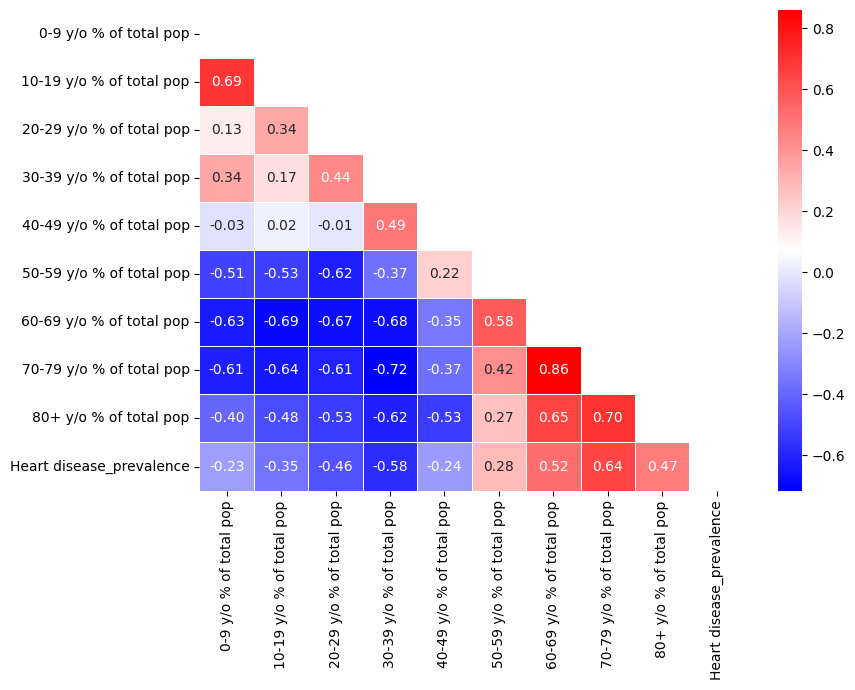

In [251]:
corr = df[age_columns].corr

corr = df[age_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

In [252]:
# Combine age groups into broader categories
df["age 0-19 pct %"] = df["0-9 y/o % of total pop"] + df["10-19 y/o % of total pop"]
df["age 20-39 pct %"] = df["20-29 y/o % of total pop"] + df["30-39 y/o % of total pop"]
df["age 40-59 pct %"] = df["40-49 y/o % of total pop"] + df["50-59 y/o % of total pop"]
df["age 60-79 pct %"] = df["60-69 y/o % of total pop"] + df["70-79 y/o % of total pop"]
df["age 80+ pct %"] = df["80+ y/o % of total pop"]

Se han agrupado las edades en un rango de 20 años para recudir el número de variables que aportan información del mismo grupo de personas

In [253]:
# Drop original age columns
age_columns_to_drop = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
                       "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop"]

df = df.drop(age_columns_to_drop, axis = 1)

In [254]:
age_columns_to_corr = ["age 0-19 pct %","age 20-39 pct %","age 40-59 pct %","age 60-79 pct %","age 80+ pct %", "Heart disease_prevalence"]

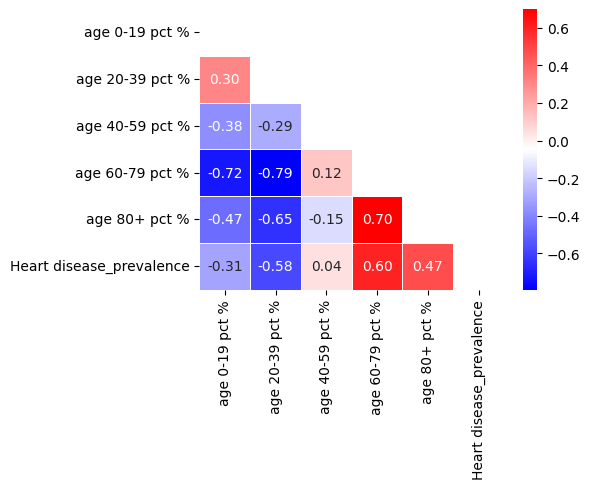

In [255]:
corr = df[age_columns_to_corr].corr

corr = df[age_columns_to_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

Se observa una fuerte correlacion entre nuestro objetivo y las variables de edades entre '60-79 años' y '20-39 años, seguido ligeramente por las personas +80 años.

In [256]:
df.columns

Index(['TOT_POP', '% White-alone', '% Black-alone', '% NA/AI-alone',
       '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General Surgeons

In [257]:
races = ['% White-alone', '% Black-alone', '% NA/AI-alone',
       '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Heart disease_prevalence']

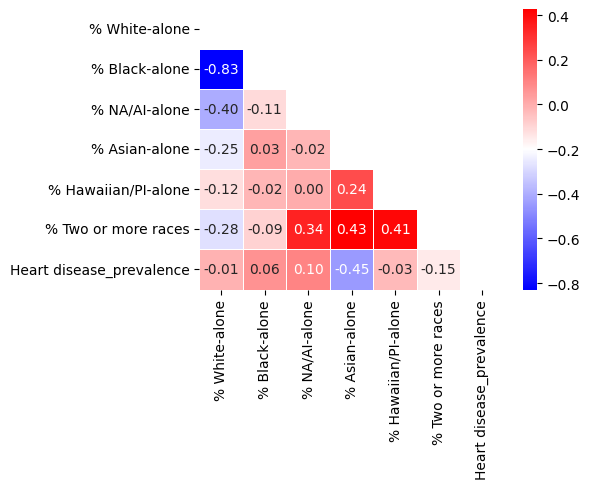

In [258]:
corr = df[races].corr

corr = df[races].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

- Vemos que la correlacion mas fuerte con nuestro objetivo se da en las personas asiaticas.

- Además, 'white-alone' no nos aporta nada a nuestra informacion, dando todas negativas. Inclusive tiene fuerte negatividad con 'Black alone', lo que puede generar conflicto al armarse el modelo predictivo.

In [259]:
df = df.drop(['% White-alone'], axis=1)

In [260]:
df.columns

Index(['TOT_POP', '% Black-alone', '% NA/AI-alone', '% Asian-alone',
       '% Hawaiian/PI-alone', '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General Surgeons per 100000 Popul

In [261]:
others = [ 'Total Population',
       'Population Aged 60+', 'Percent of Population Aged 60+',
       'county_pop2018_18 and older', 'anycondition_prevalence',
       'anycondition_number', 'Obesity_prevalence', 'Obesity_number', 'COPD_prevalence',
       'COPD_number', 'diabetes_prevalence', 'diabetes_number',
       'CKD_prevalence', 'CKD_number', 'Urban_rural_code', 'age 0-19 pct %',
       'age 20-39 pct %', 'age 40-59 pct %', 'age 60-79 pct %',
       'age 80+ pct %', 'Heart disease_number', 'Heart disease_prevalence']

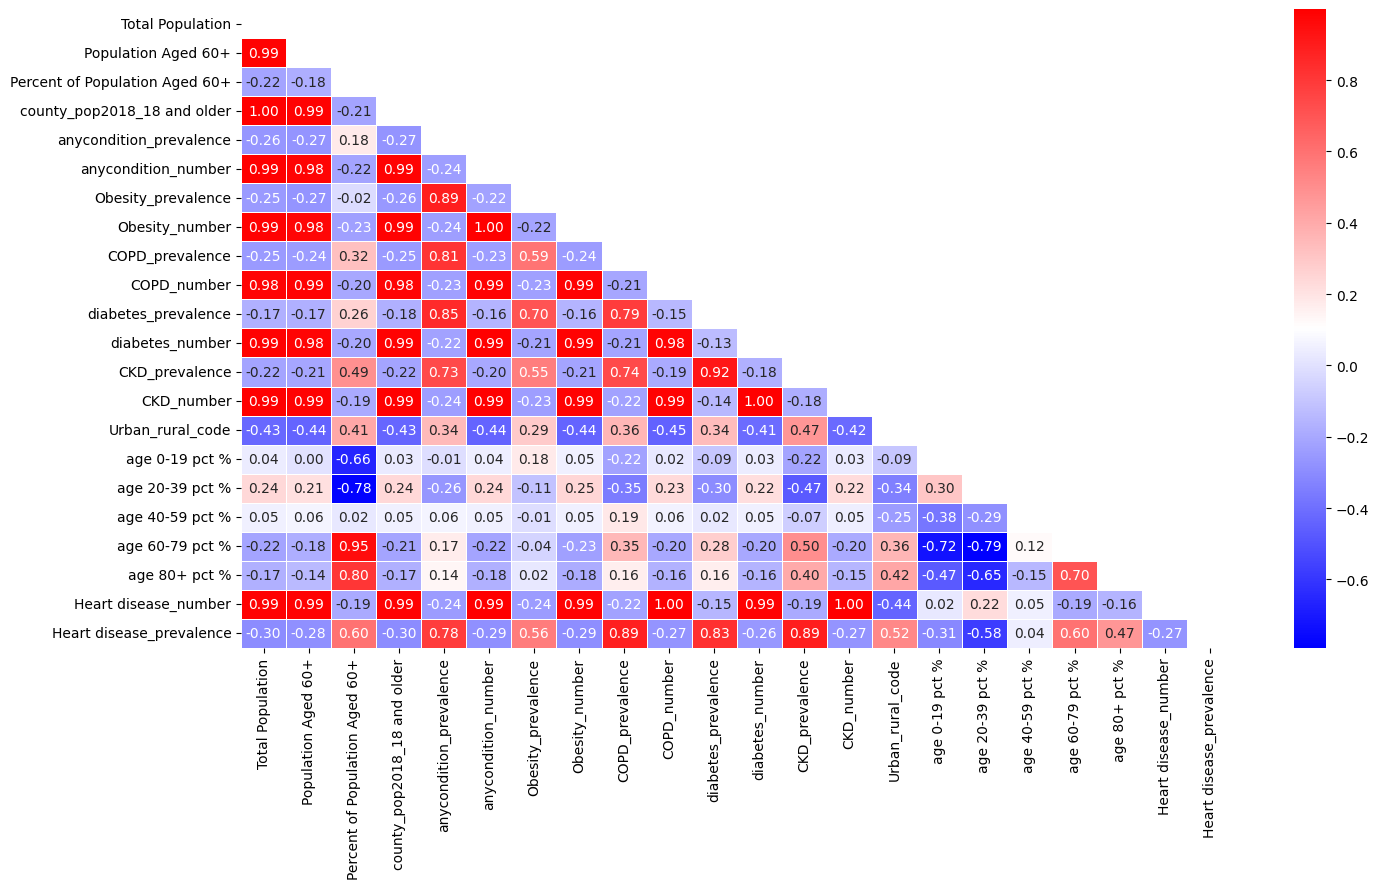

In [262]:
corr = df[others].corr

corr = df[others].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

se eliminan datos que puedan afectar la prediccion del modelo. Como los _number y la poblacion duplicada de 0-18.

In [263]:
others_filter =  ['Percent of Population Aged 60+',
       'Obesity_prevalence', 'COPD_prevalence',
       'diabetes_prevalence', 
       'CKD_prevalence', 'Urban_rural_code', 'age 0-19 pct %',
       'age 20-39 pct %', 'age 40-59 pct %', 'age 60-79 pct %',
       'age 80+ pct %', 'Heart disease_prevalence']

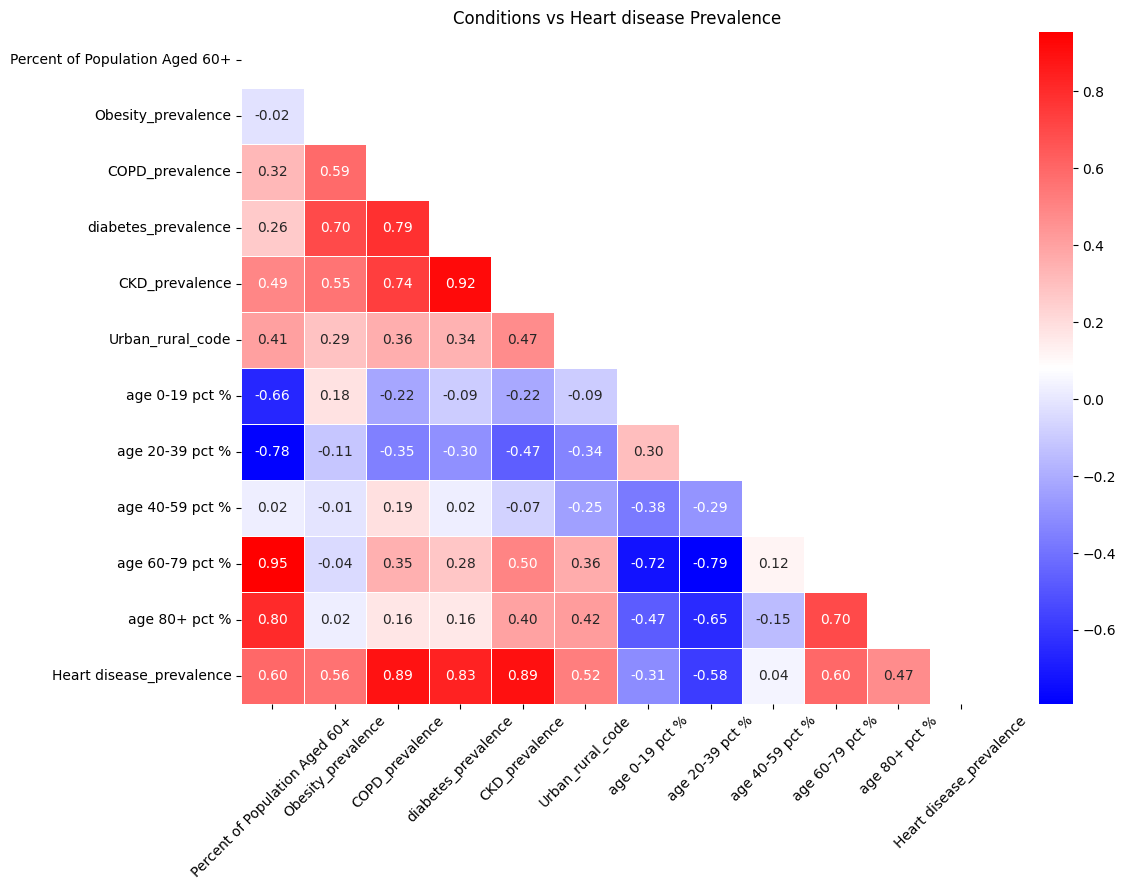

In [264]:
corr = df[others_filter].corr

corr = df[others_filter].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')
plt.title("Conditions vs Heart disease Prevalence")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [265]:
mixed =  ['anycondition_prevalence',
       'Obesity_prevalence', 'COPD_prevalence',
       'diabetes_prevalence', 
       'CKD_prevalence', 'Heart disease_prevalence']

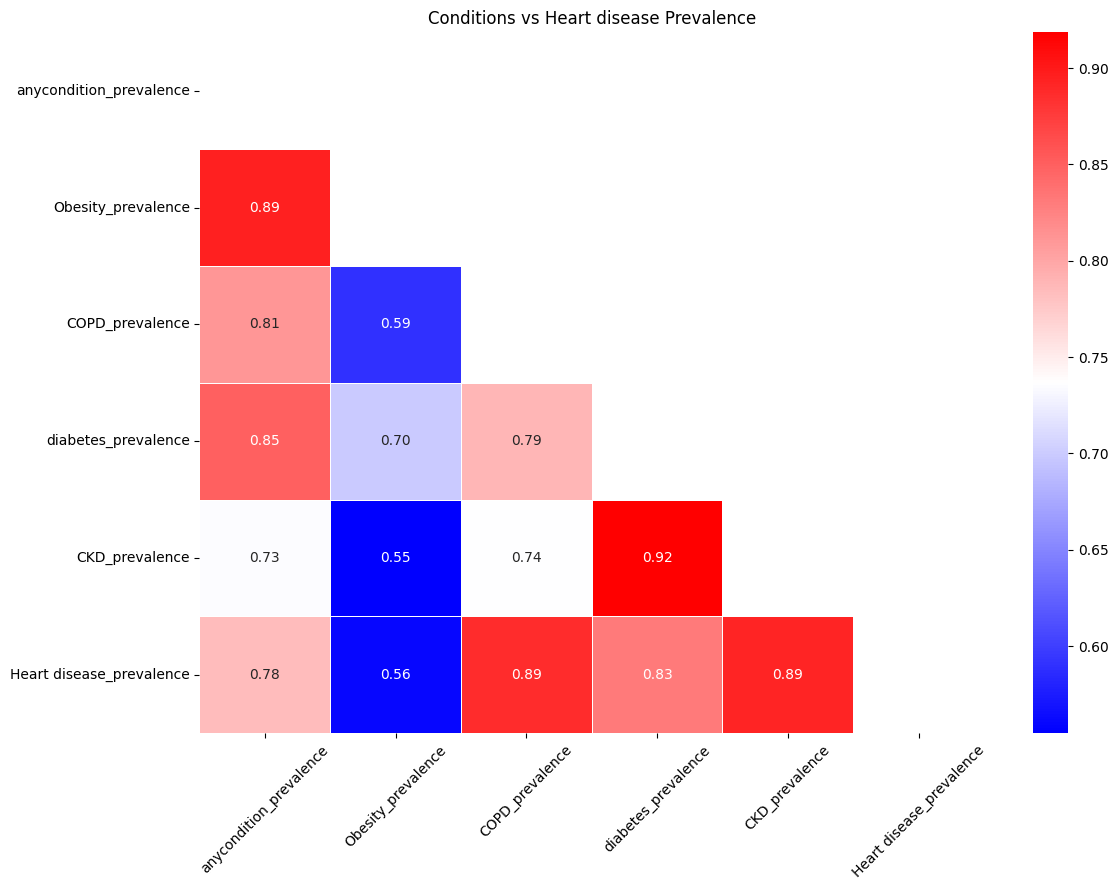

In [266]:
corr = df[mixed].corr

corr = df[mixed].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')
plt.title("Conditions vs Heart disease Prevalence")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### **Observaciones:**
- La mayor correlacion se da con CKD_prevalence y diabetes, lo cual para no generar multicolinealidad en el modelo, eliminaremos una.
- 'Heart disease_prevalence' tiene una correlación muy alta con CKD_prevalence 0.89. Esto indica una relación muy fuerte entre ambas, posiblemente porque comparten factores de riesgo clínicos.
- También muestra una correlación alta con COPD_prevalence (0.89). Las enfermedades respiratorias crónicas pueden estar vinculadas con ataques cardiacos.
- La prevalencia de diabetes tiene una correlación importante 0.83. 
- La variable Obesity_prevalence está menos correlacionada con heart disease prevalence (0.56)

La mayor correlación del gráfico es diabetes <-> CKD (0.92)
Esto muestra una redundancia muy fuerte entre ambas variables, lo que puede generar multicolinealidad en modelos predictivos.

### **Me quedo con esta parte de la información del data set**

In [267]:
df = df.drop(['CKD_prevalence'], axis=1)

In [268]:
df.shape

(3140, 49)

### **Outliers**
- Analisis de valores atipicos

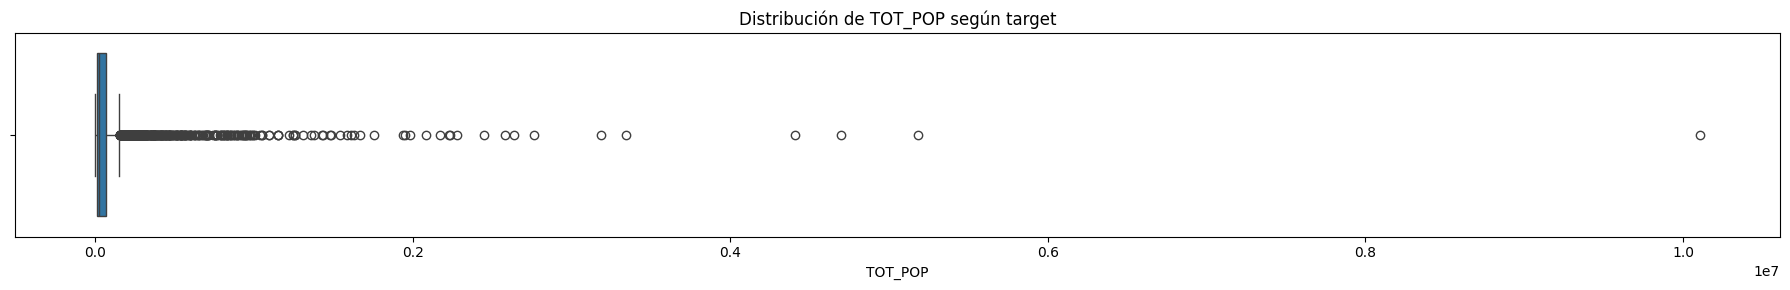

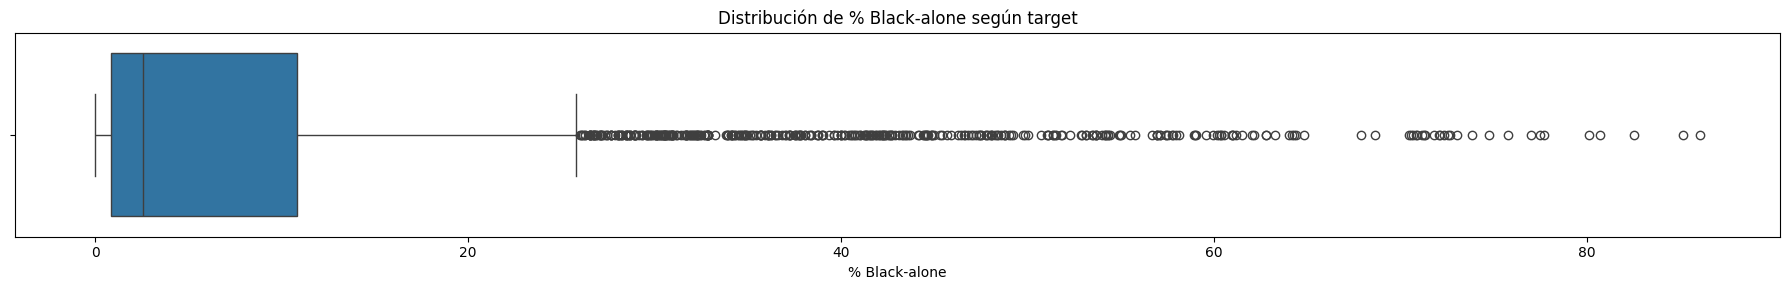

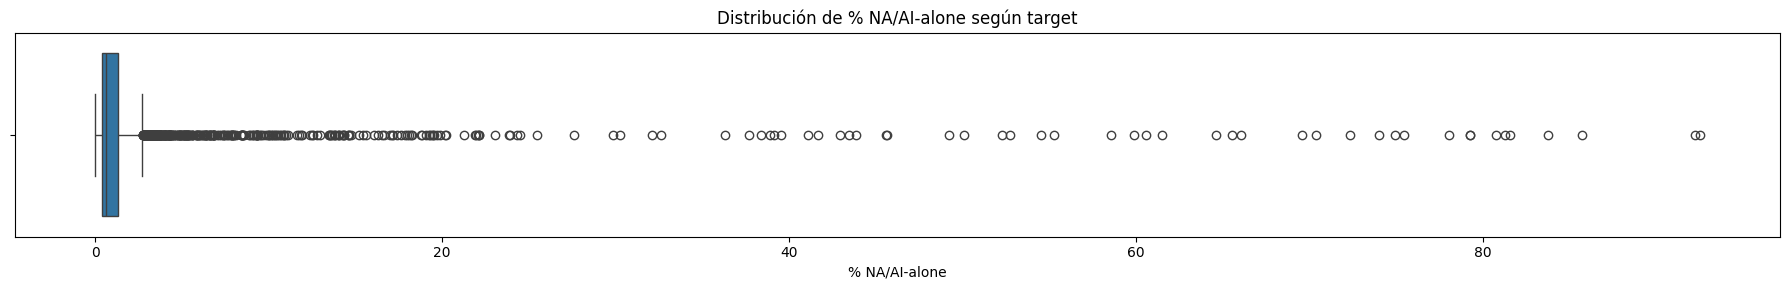

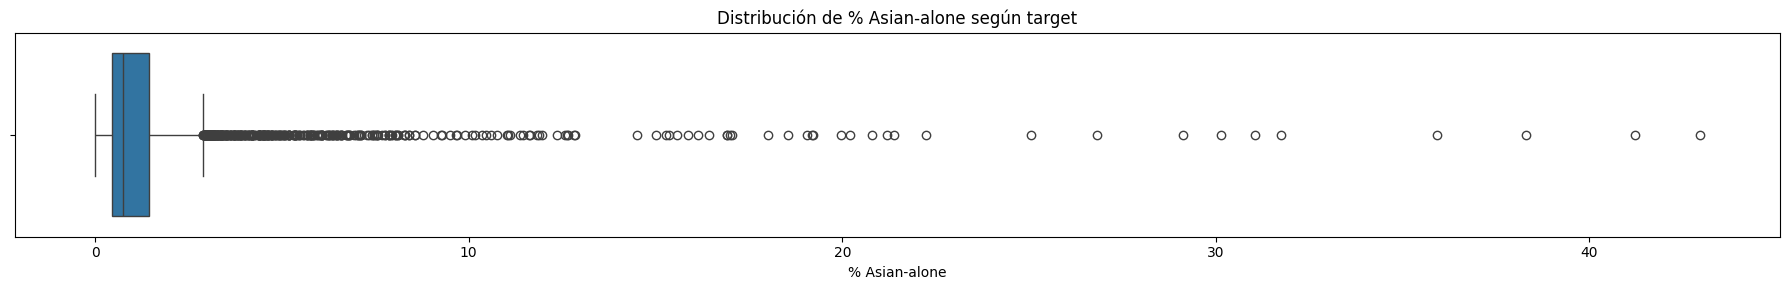

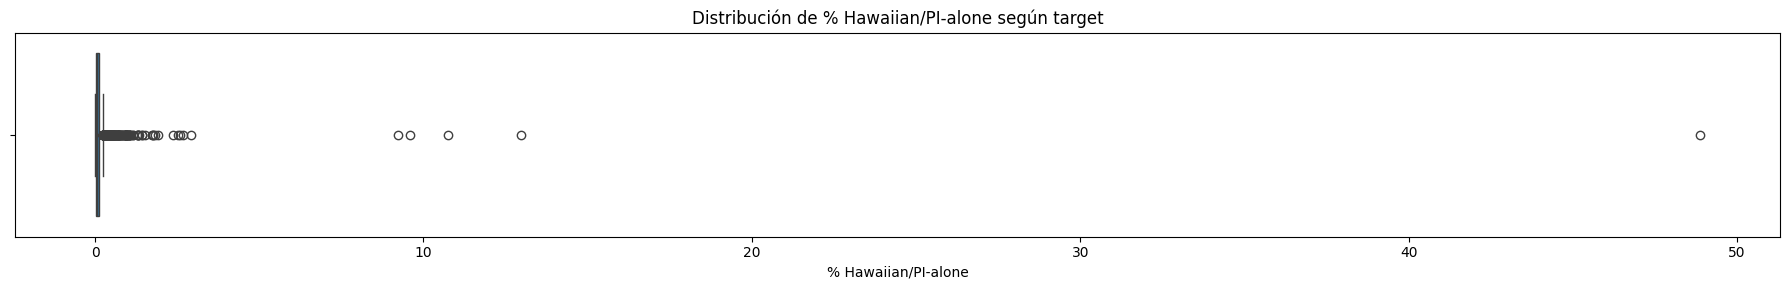

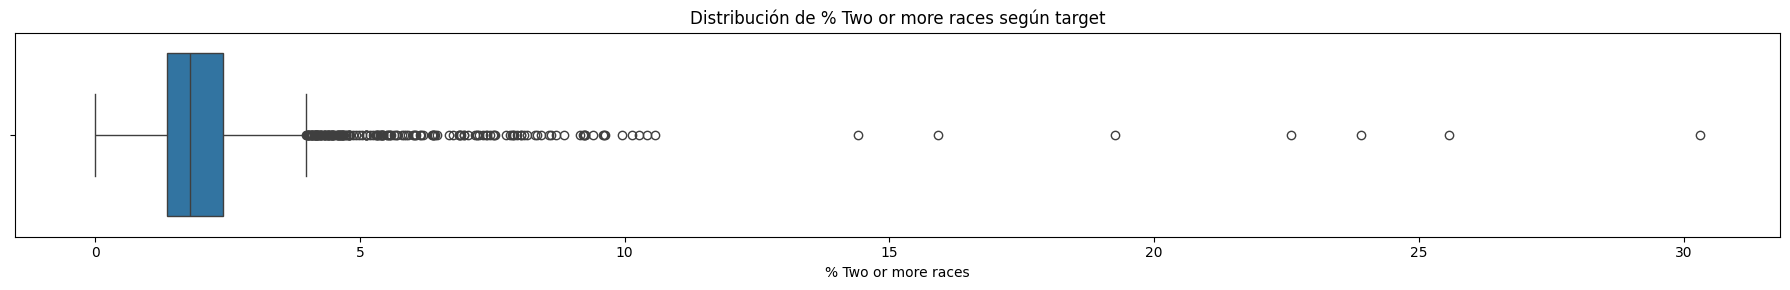

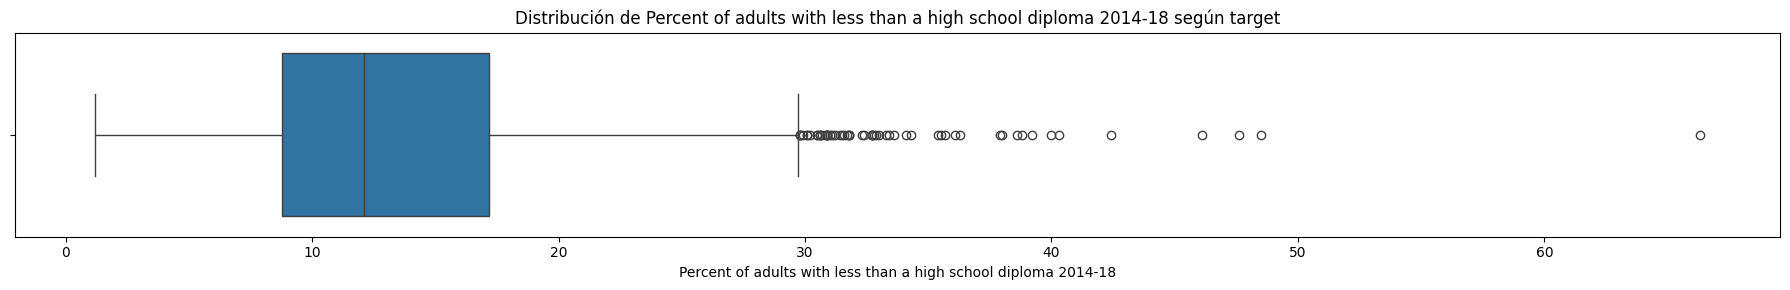

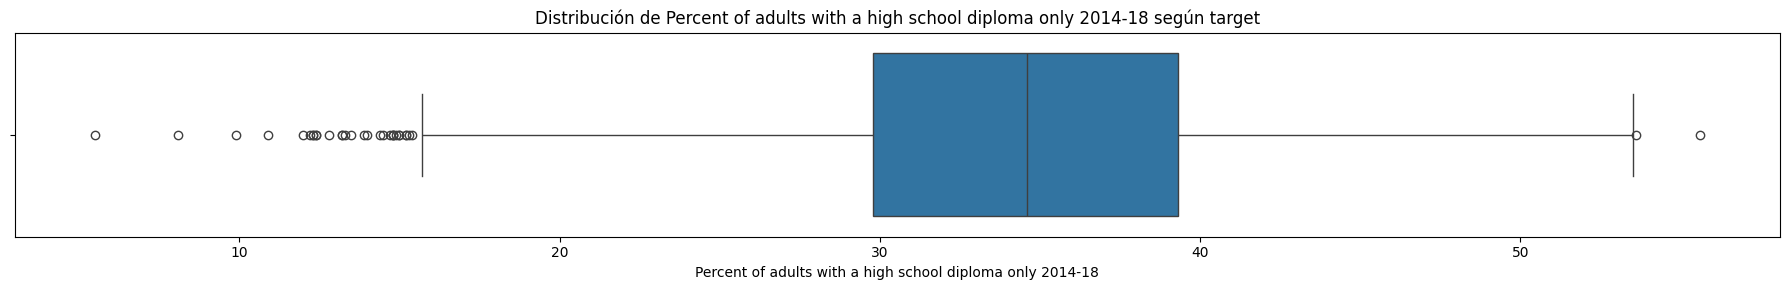

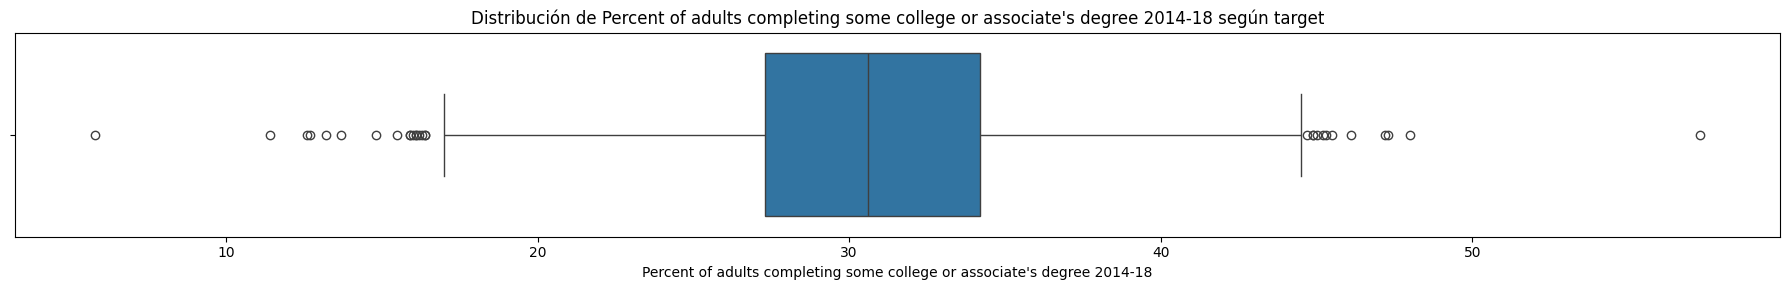

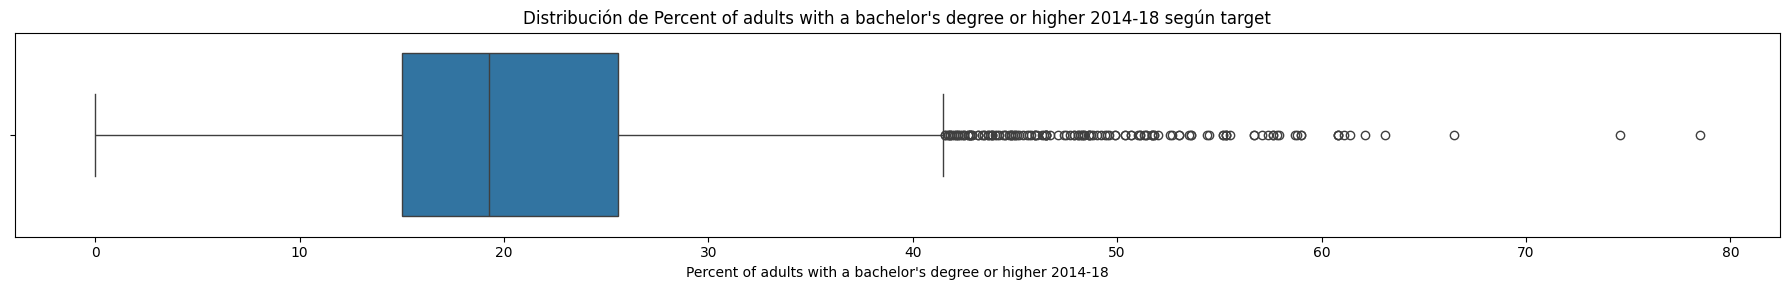

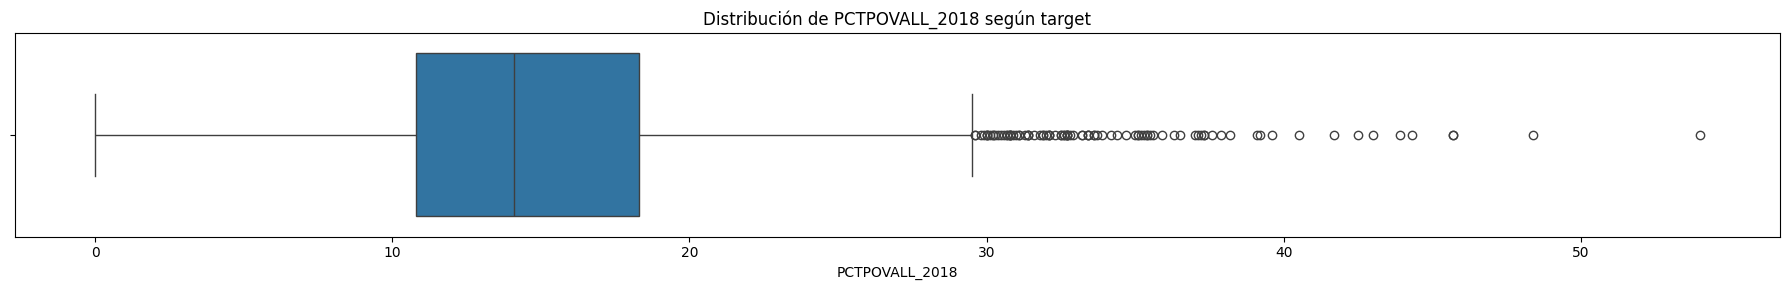

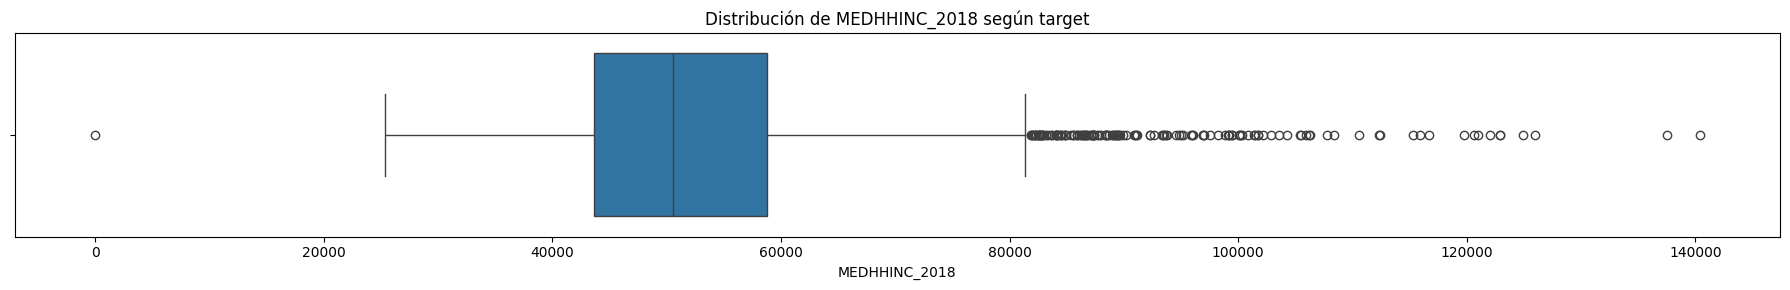

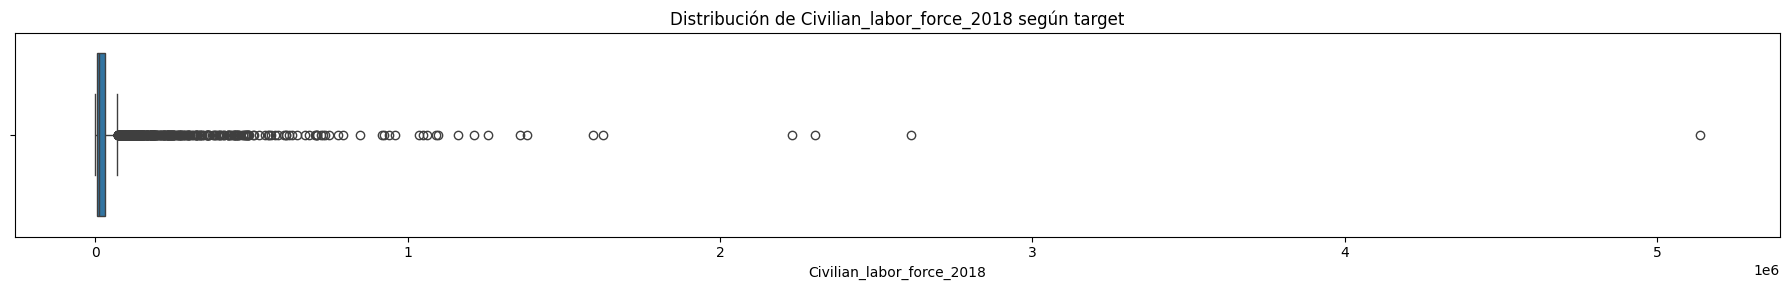

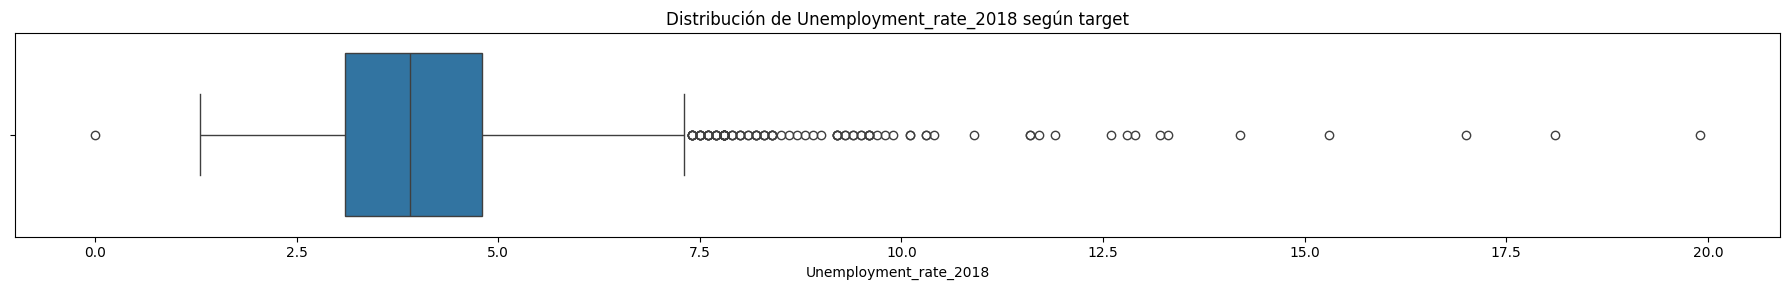

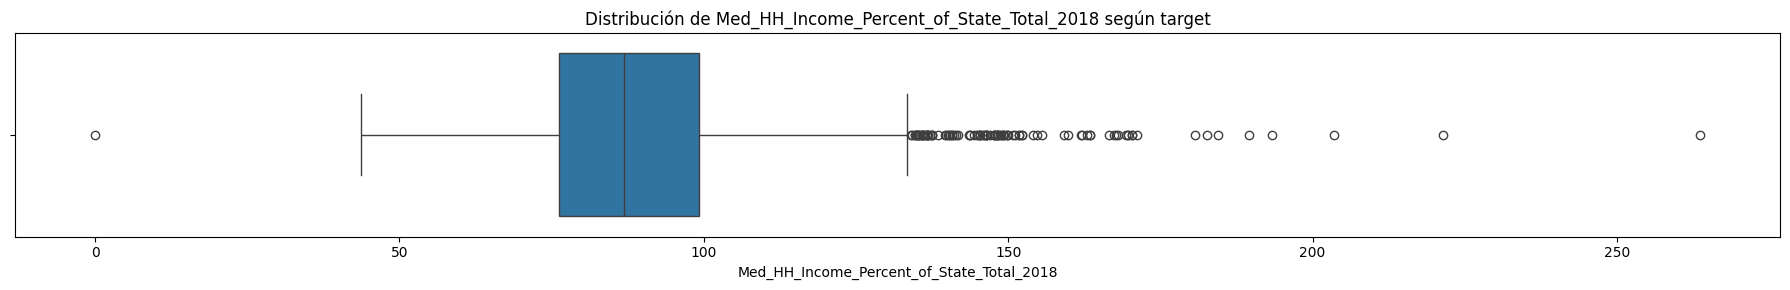

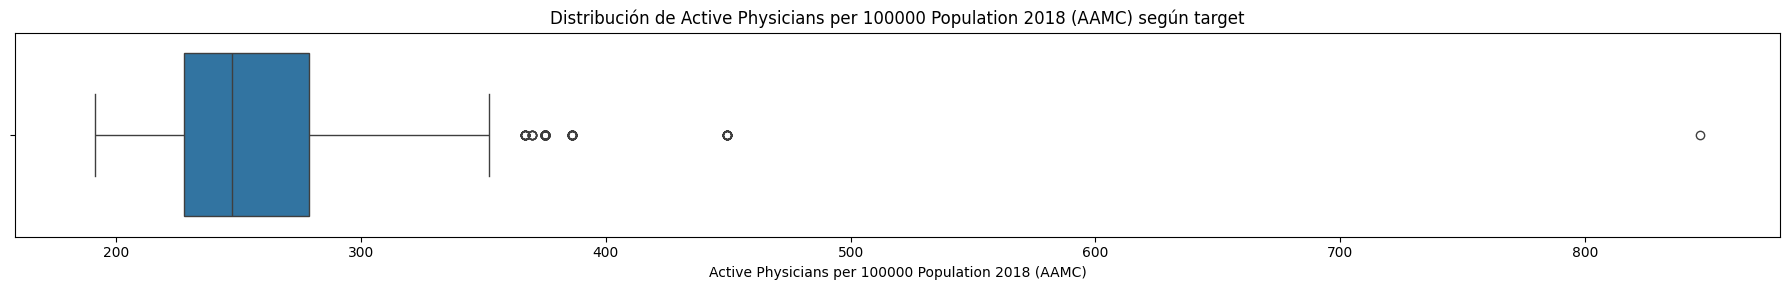

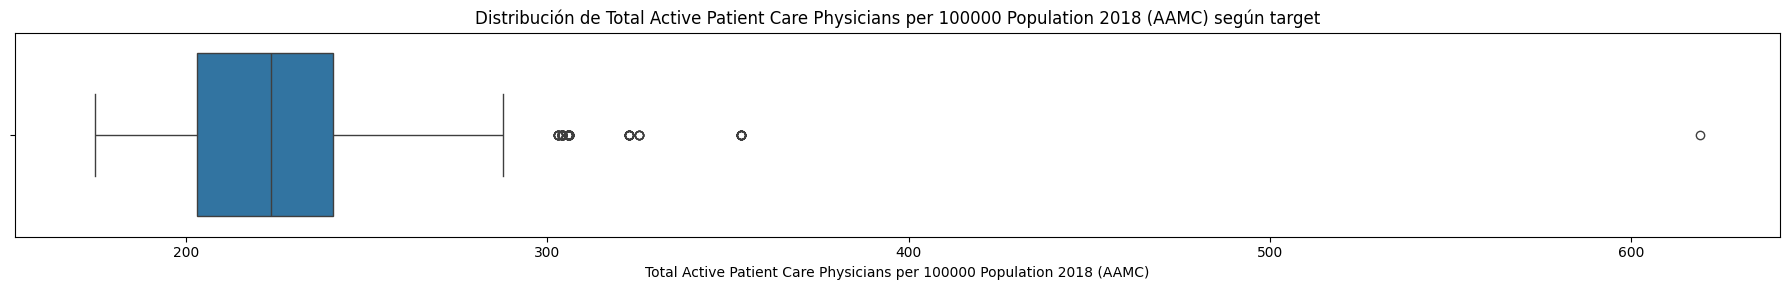

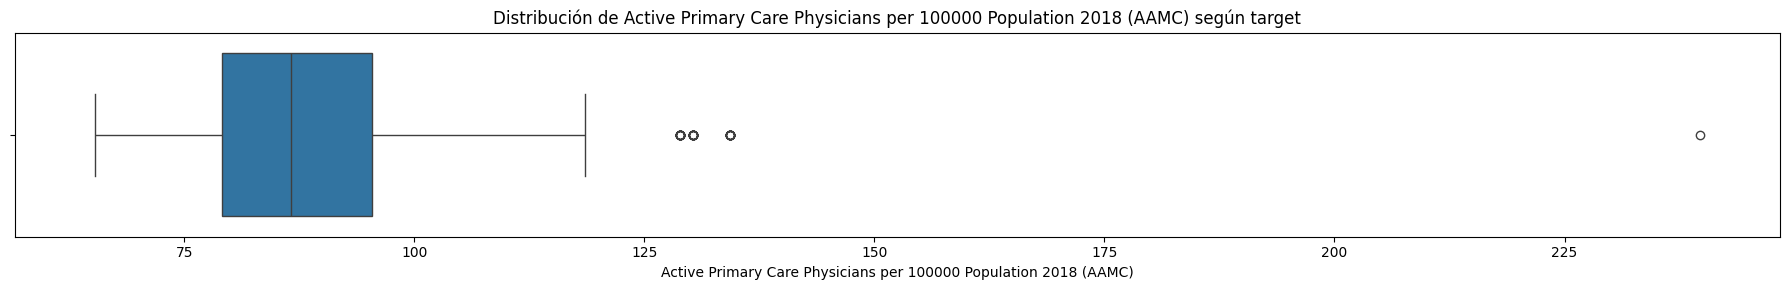

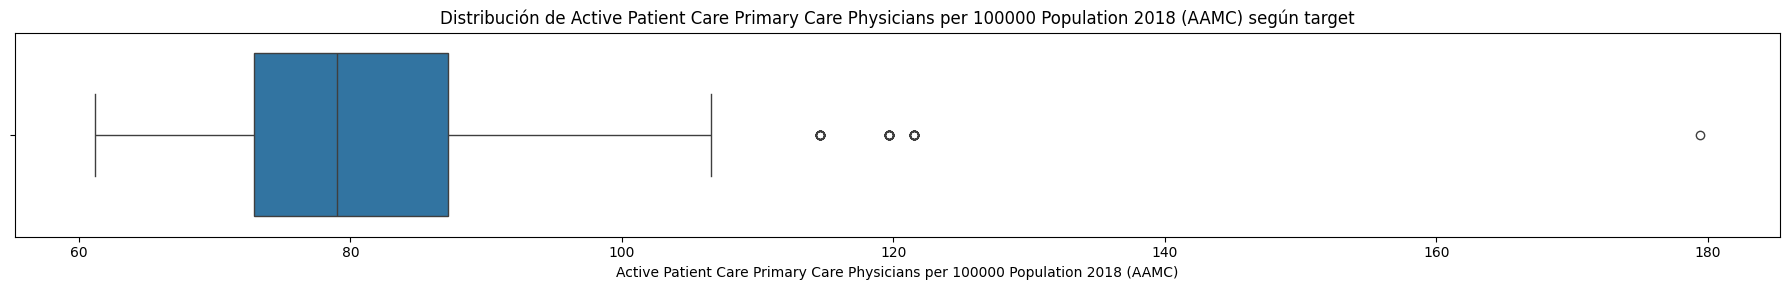

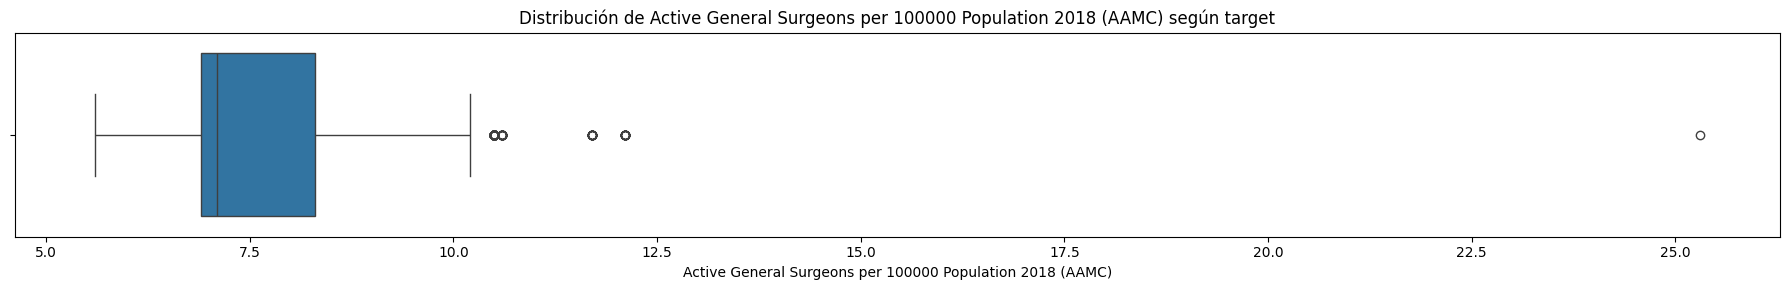

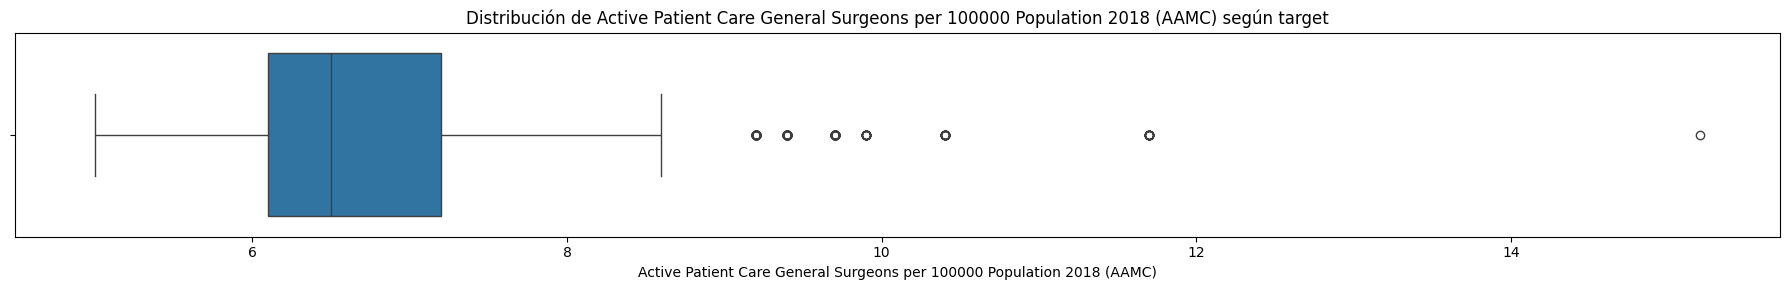

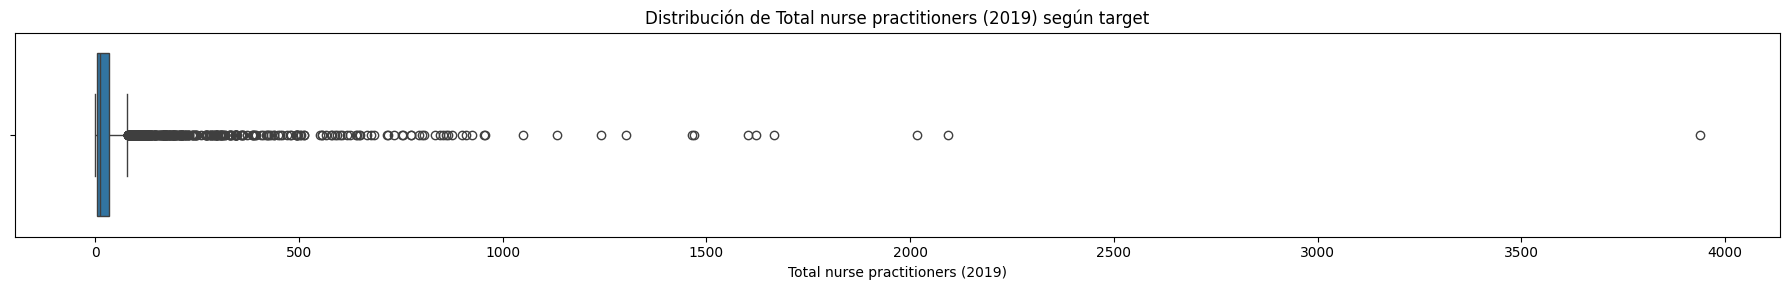

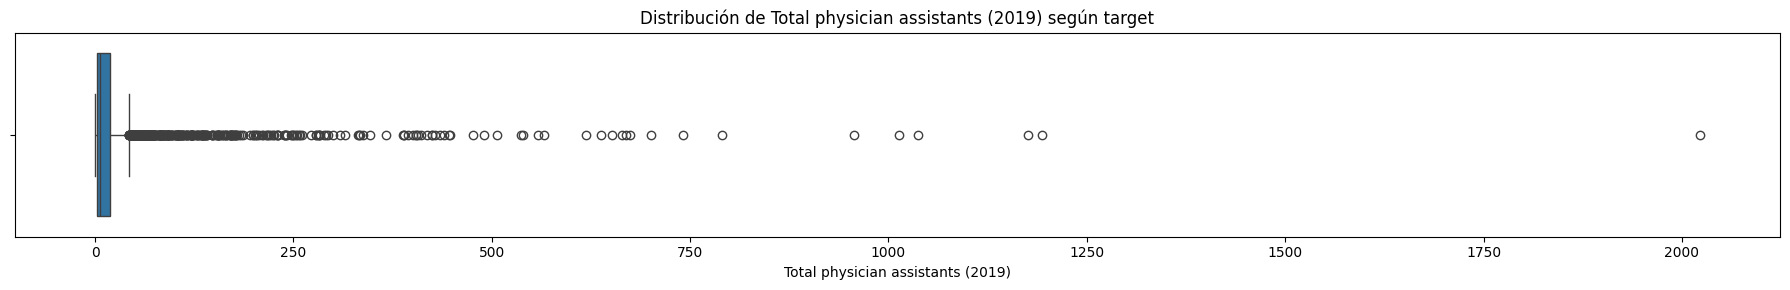

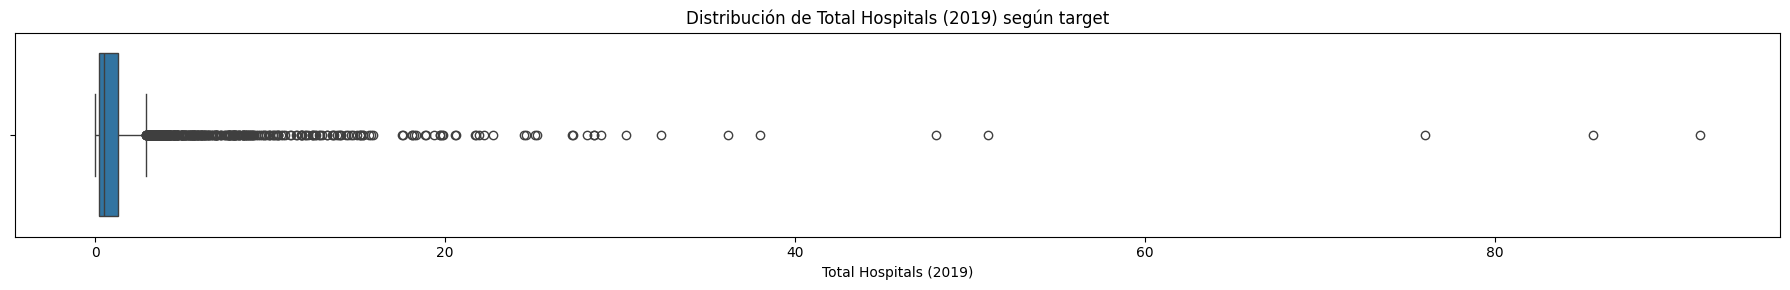

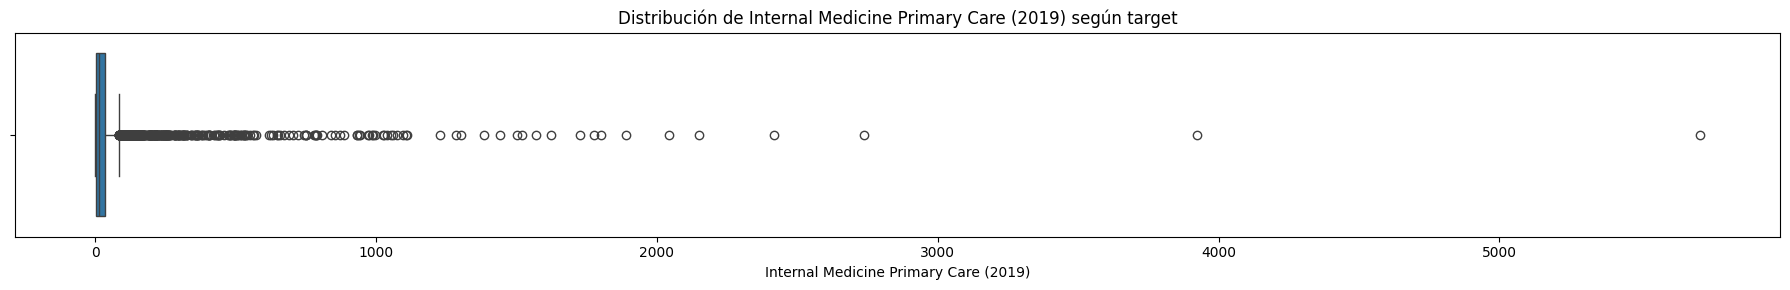

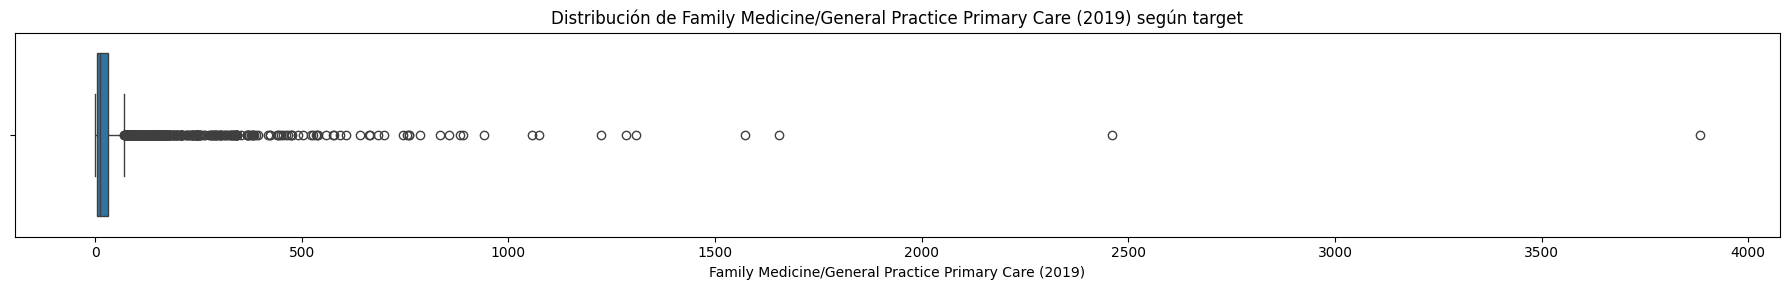

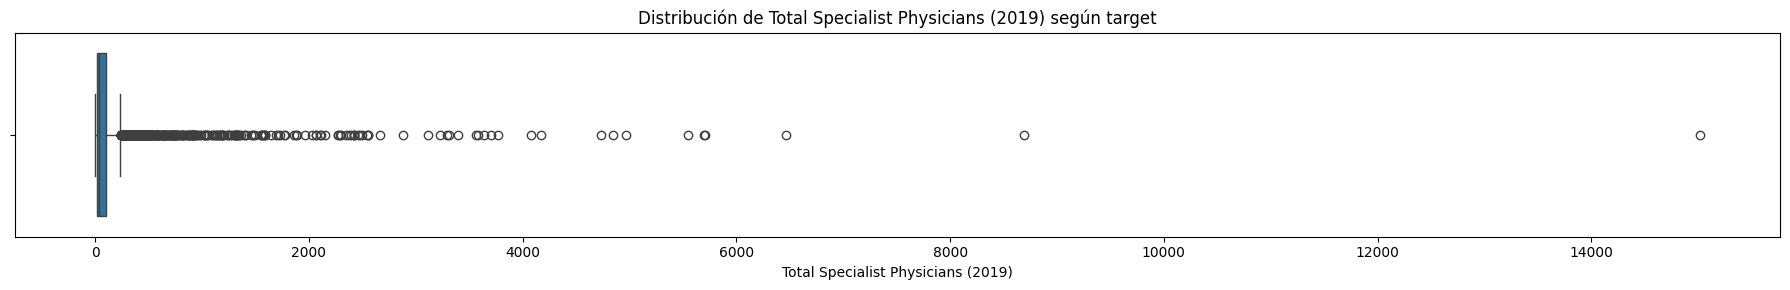

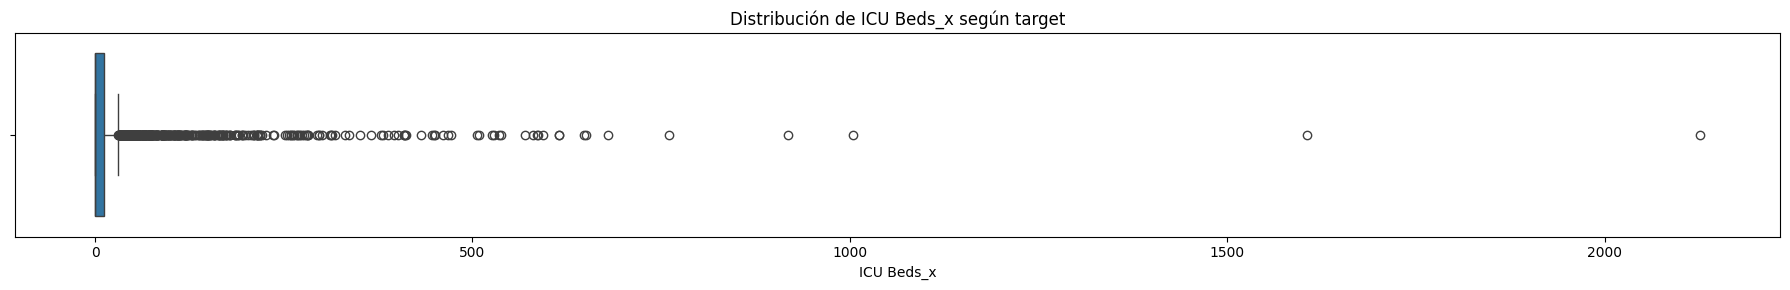

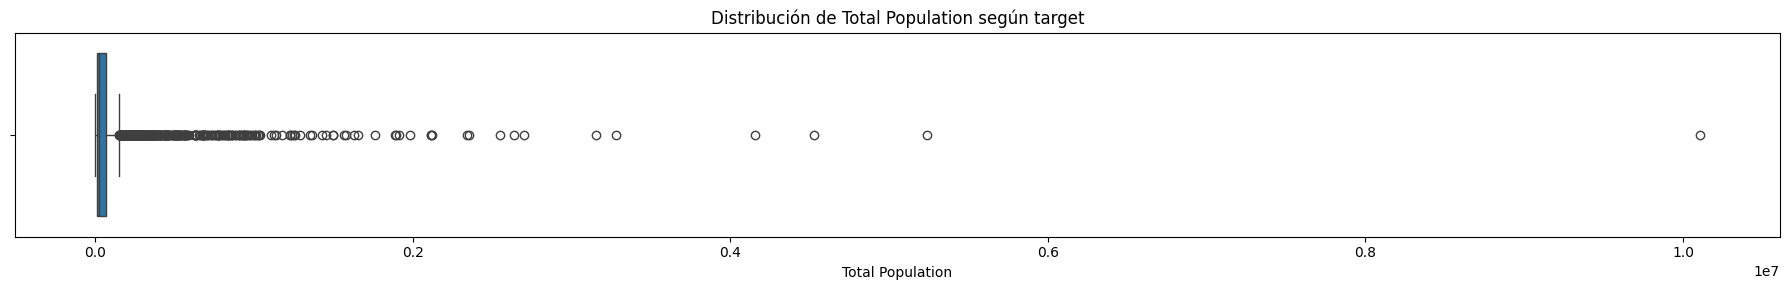

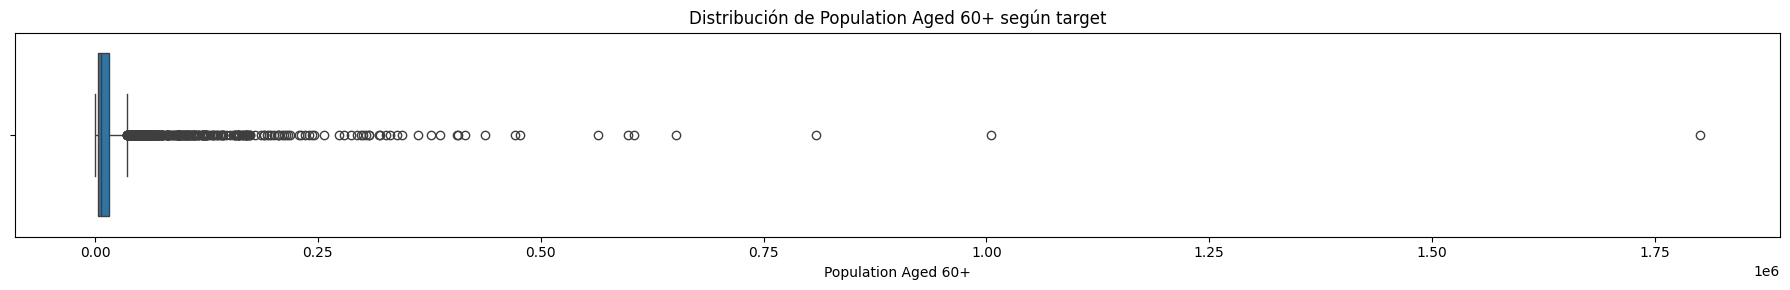

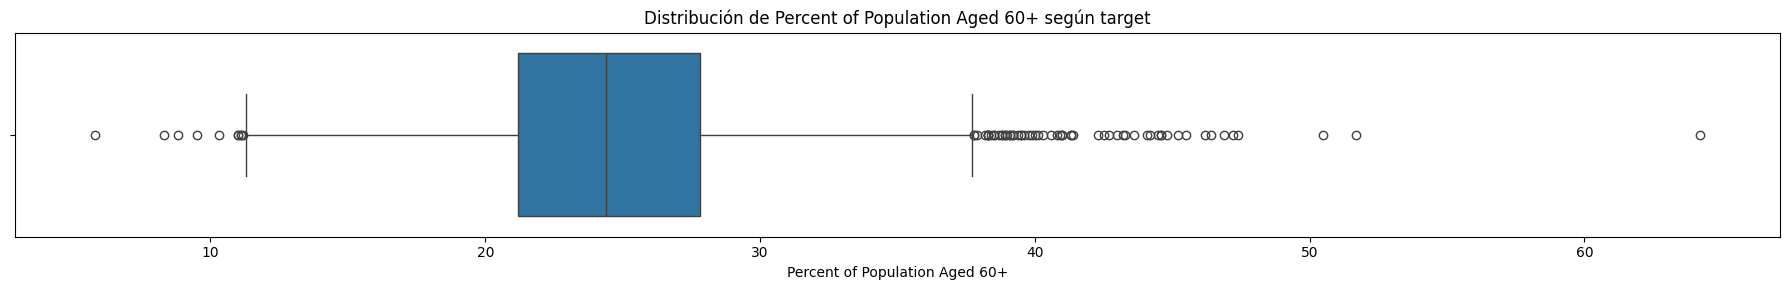

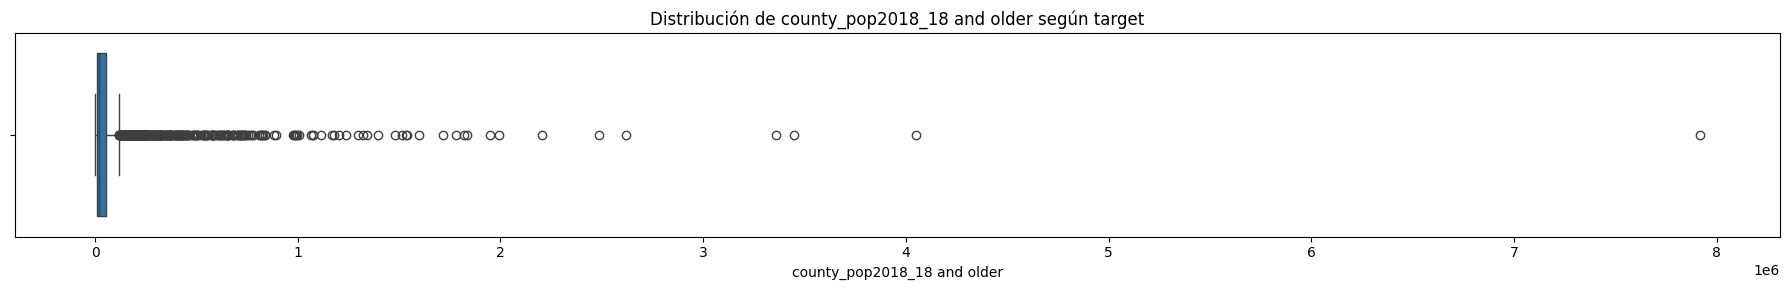

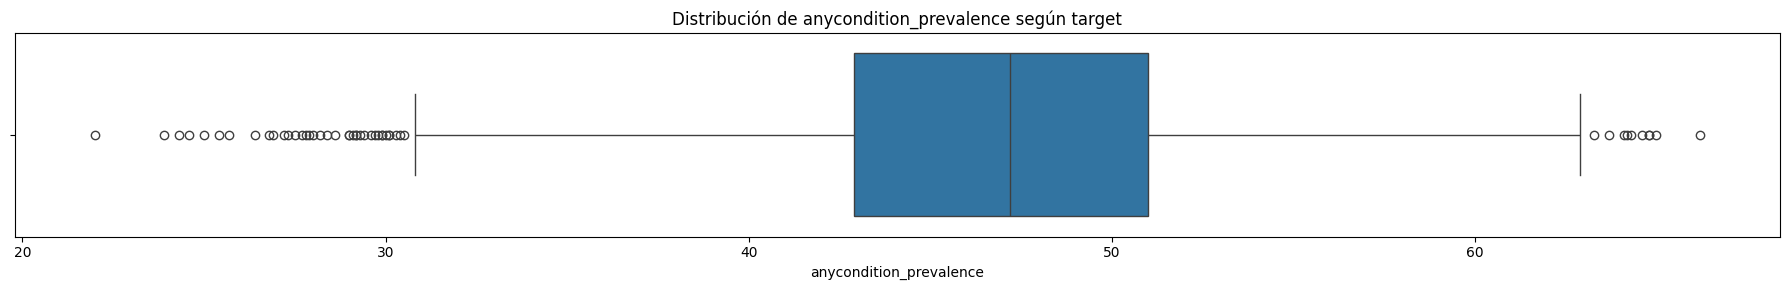

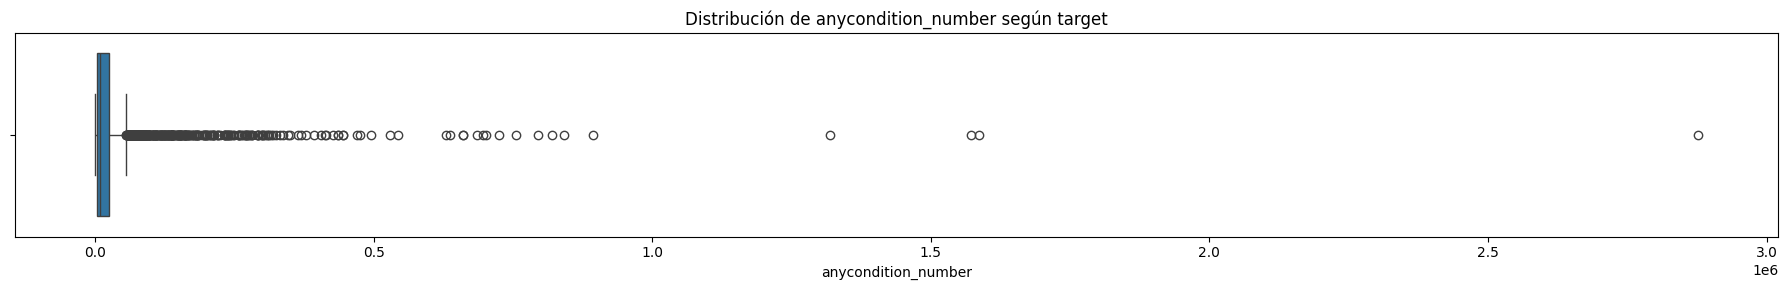

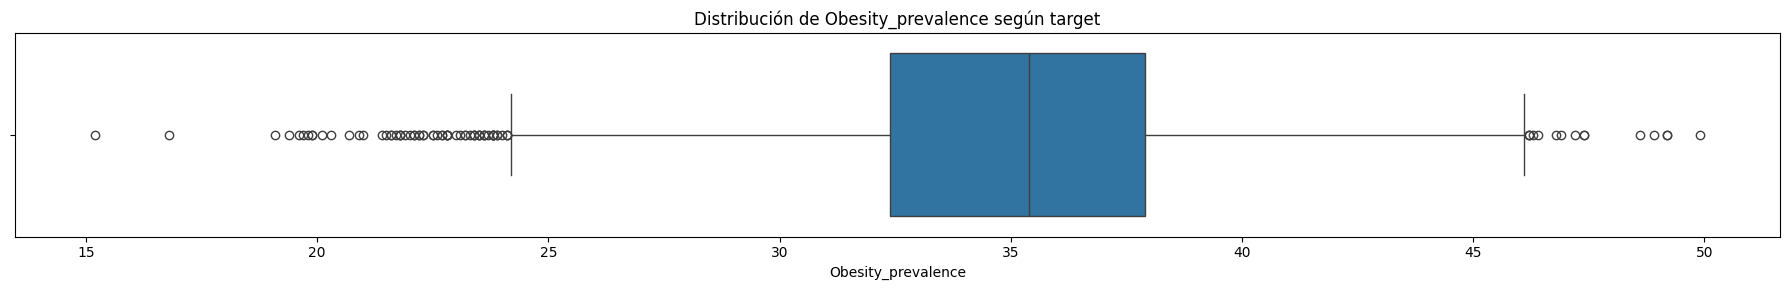

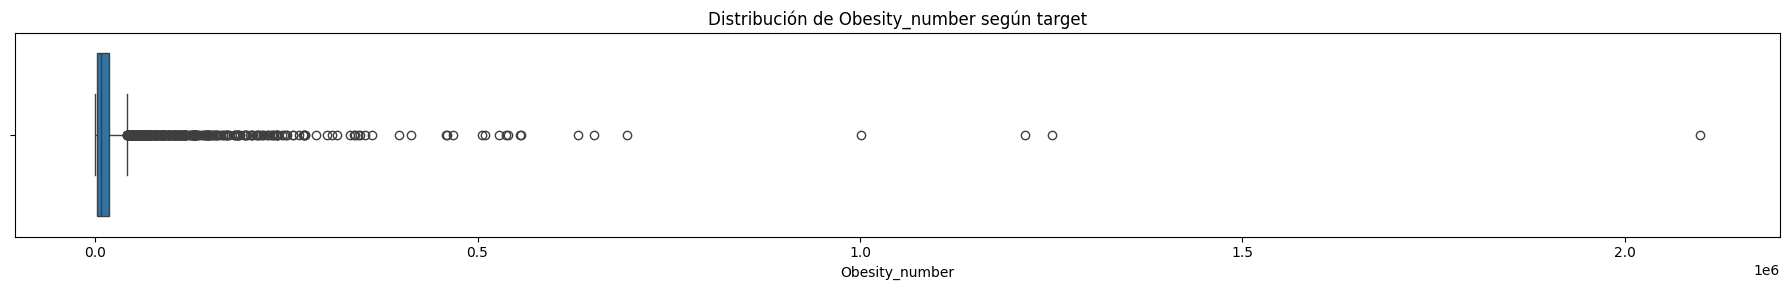

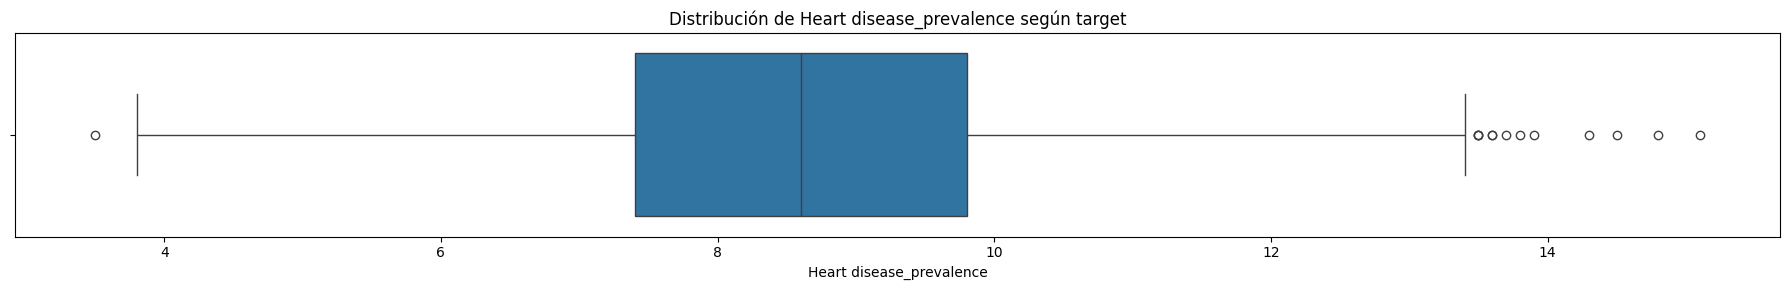

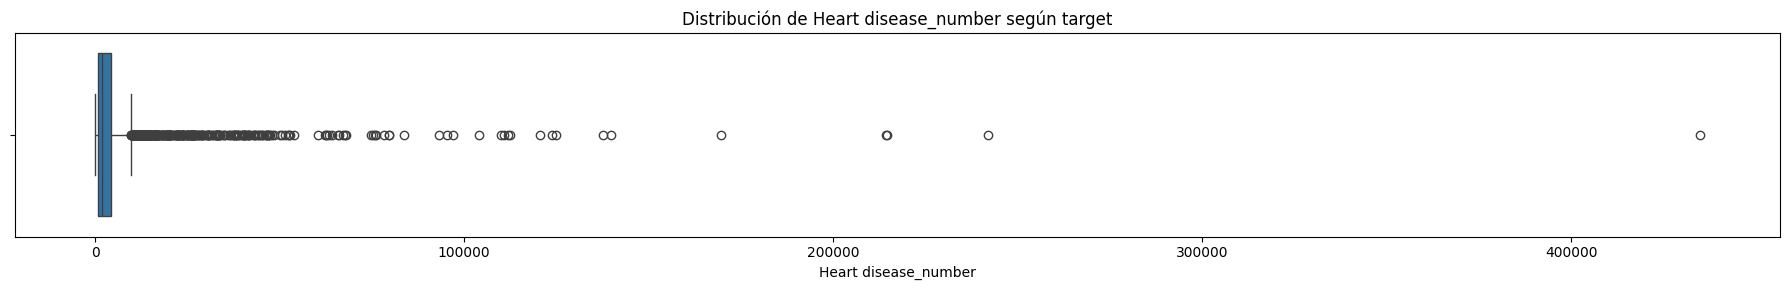

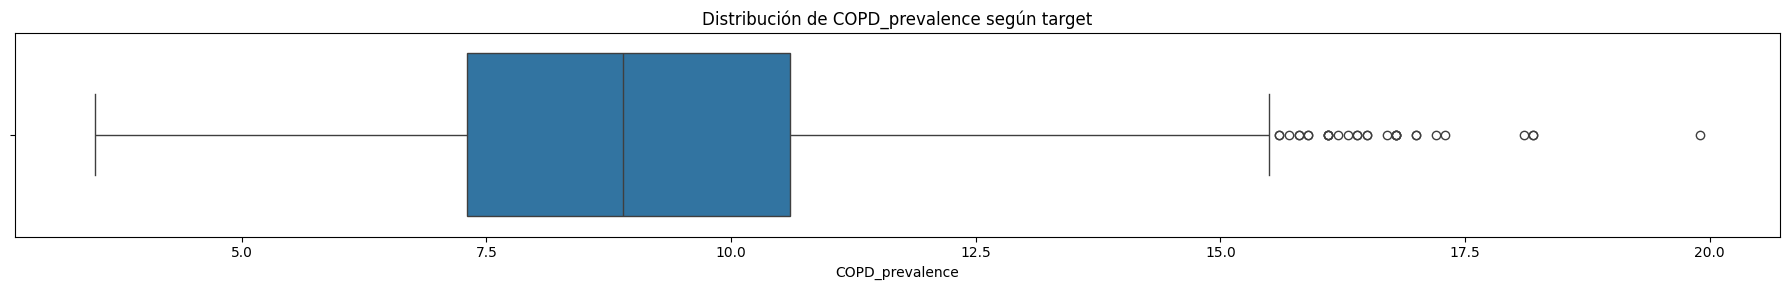

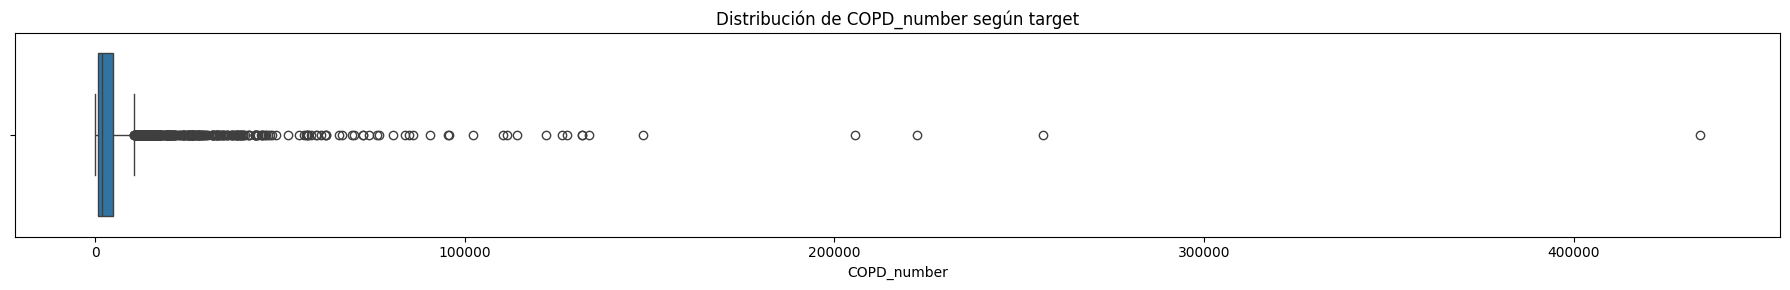

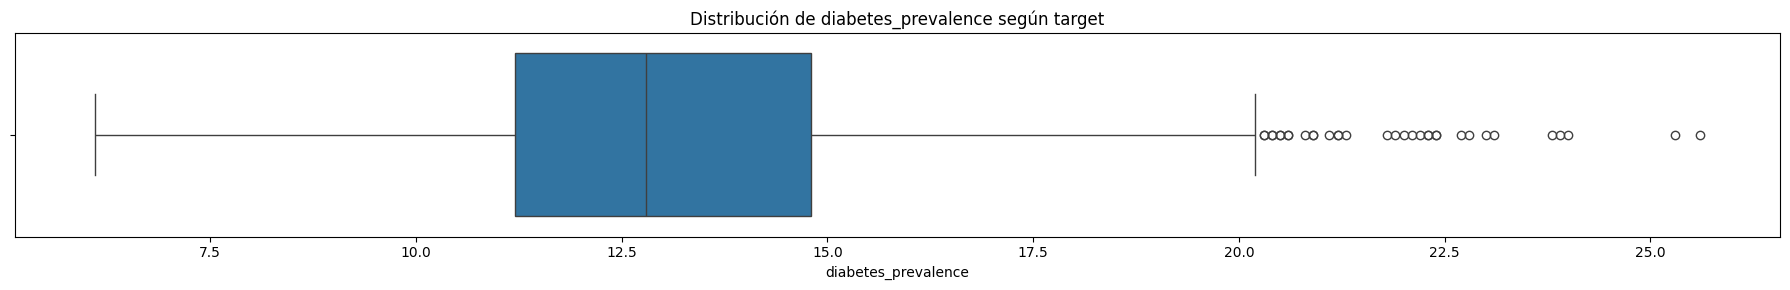

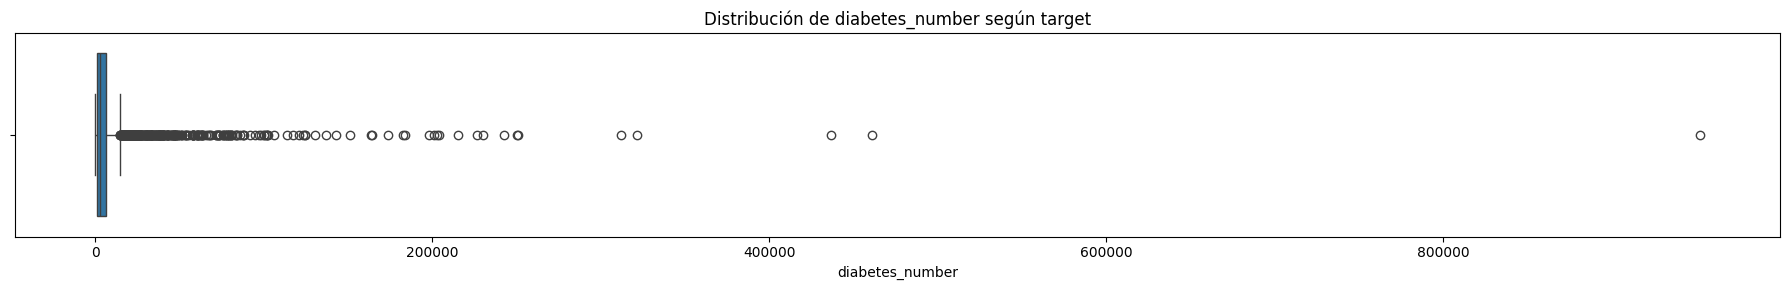

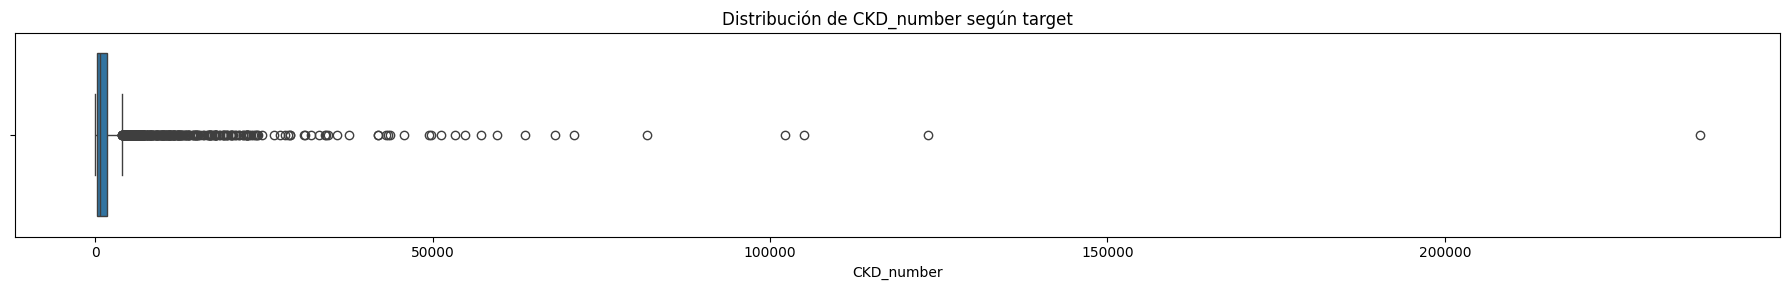

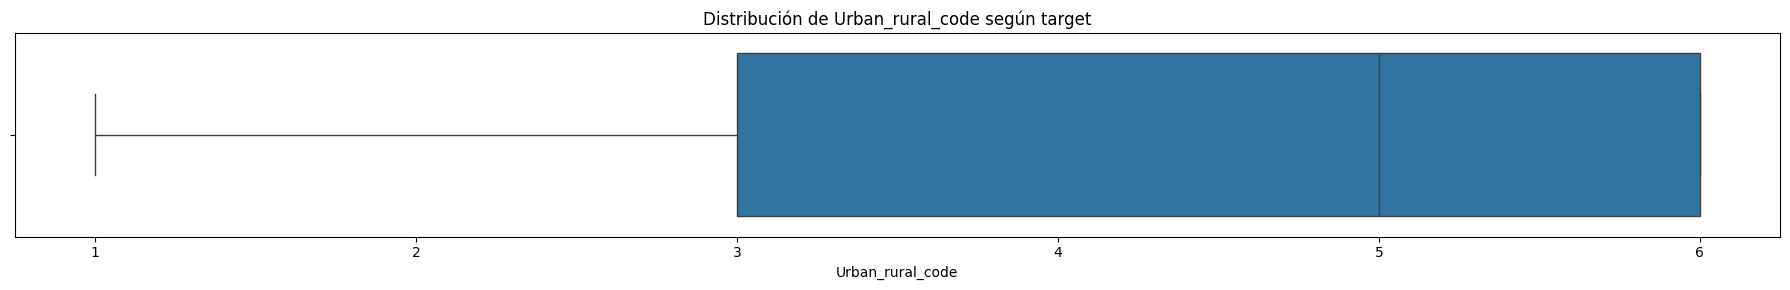

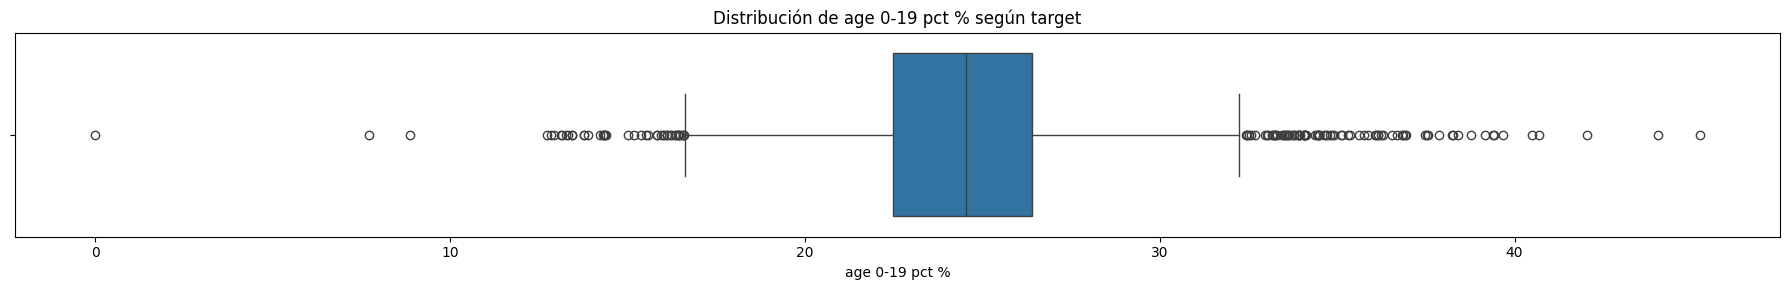

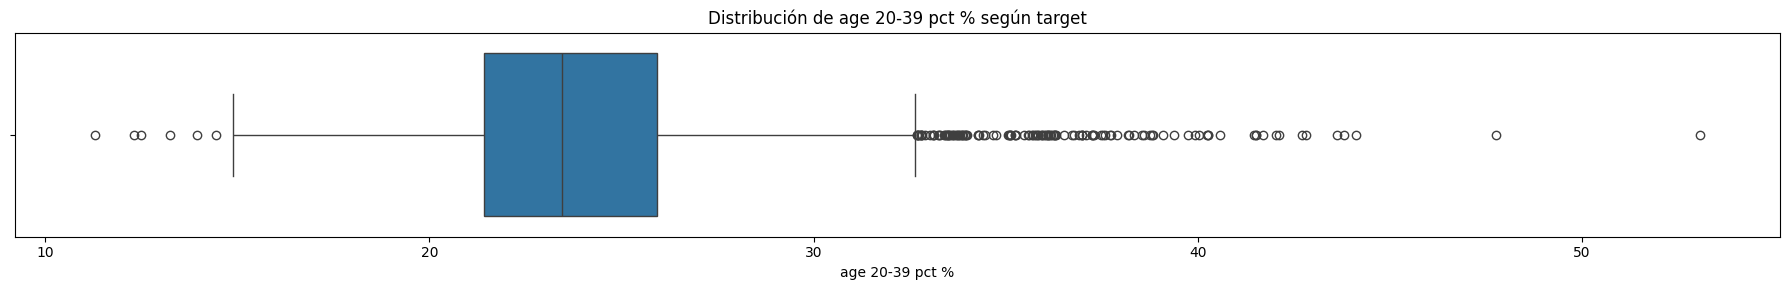

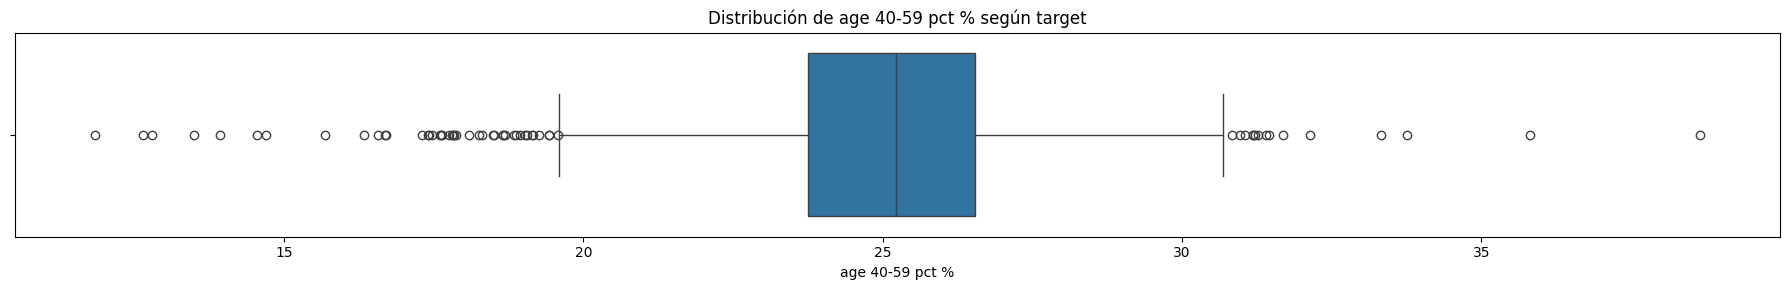

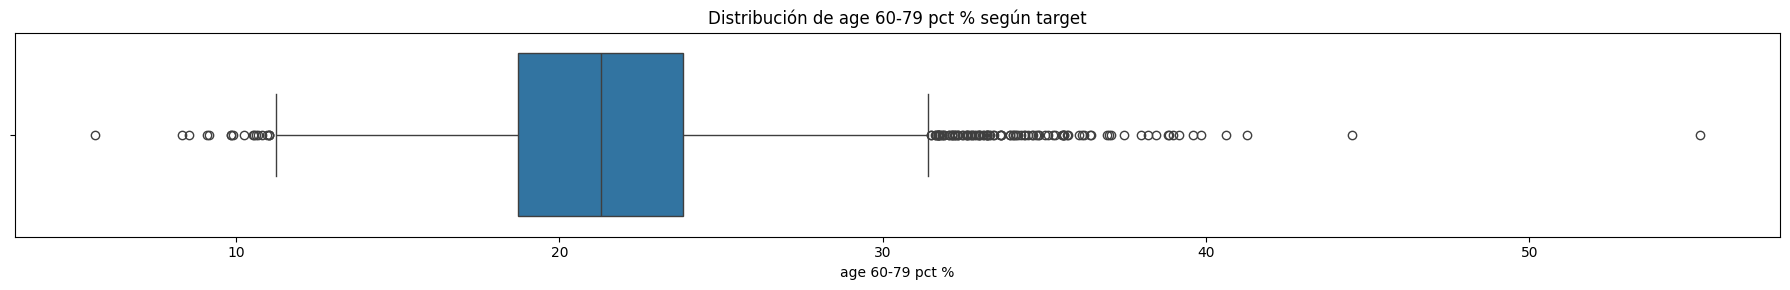

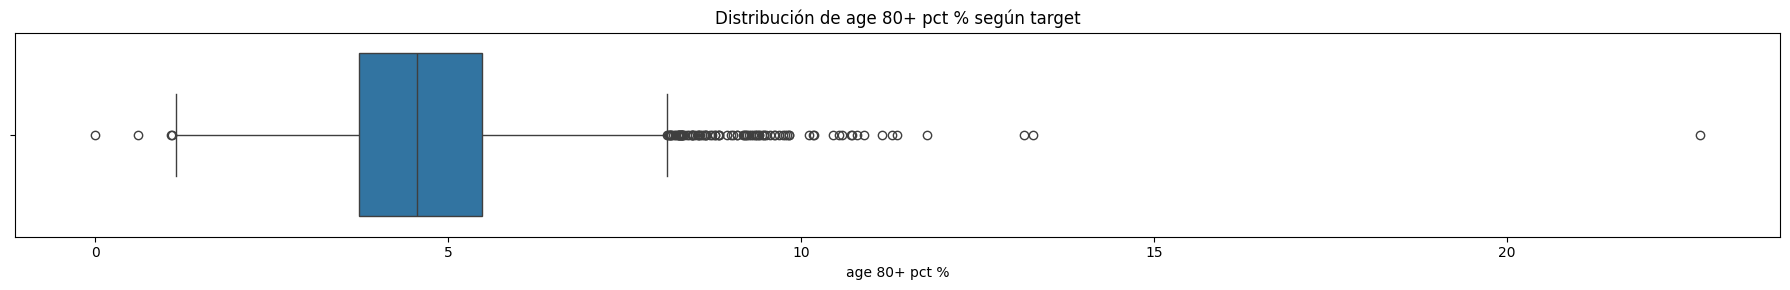

In [269]:
for var in df:
    plt.figure(figsize=(18,3))
    sns.boxplot(data=df, x=var, orient="h")
    plt.title(f"Distribución de {var} según target")
    plt.tight_layout()
    plt.show()

In [270]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
for column in df:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Definir los límites inferior y superior
    lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    print(f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}")

Límites superior: 153337.62, límite inferior: 0, rango intercuartílico: 56949.75
Límites superior: 25.83, límite inferior: 0, rango intercuartílico: 9.98
Límites superior: 2.75, límite inferior: 0, rango intercuartílico: 0.95
Límites superior: 2.89, límite inferior: 0, rango intercuartílico: 0.97
Límites superior: 0.25, límite inferior: 0, rango intercuartílico: 0.09
Límites superior: 3.99, límite inferior: 0, rango intercuartílico: 1.05
Límites superior: 29.8, límite inferior: 0, rango intercuartílico: 8.4
Límites superior: 53.55, límite inferior: 15.55, rango intercuartílico: 9.5
Límites superior: 44.55, límite inferior: 16.95, rango intercuartílico: 6.9
Límites superior: 41.5, límite inferior: 0, rango intercuartílico: 10.6
Límites superior: 29.55, límite inferior: 0, rango intercuartílico: 7.5
Límites superior: 81540.12, límite inferior: 20959.12, rango intercuartílico: 15145.25
Límites superior: 71711.0, límite inferior: 0, rango intercuartílico: 26716.0
Límites superior: 7.35, lí

### **Conclusion:**
- Al tratarse de valores medicos, es dificil poder eliminar un valor atipico de la situacion clinica. La mayoria de los datos que contengo se deben tomar para poder hacer una buena predicción.

### **Split: train/test**

In [271]:
X = df.drop("Heart disease_prevalence", axis=1)
y = df["Heart disease_prevalence"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

### **Scaling**

In [272]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

,TOT_POP,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,MEDHHINC_2018,Civilian_labor_force_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,county_pop2018_18 and older,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_number,Urban_rural_code,age 0-19 pct %,age 20-39 pct %,age 40-59 pct %,age 60-79 pct %,age 80+ pct %
1628,-0.296463,-0.597829,-0.043613,0.088708,-0.210493,0.121088,-0.460916,1.143830,0.413913,-0.796536,-0.022439,-0.684111,-0.290018,0.123465,-0.552343,-0.187188,0.314119,0.275994,0.750179,1.697600,2.356637,-0.328690,-0.306294,-0.331015,-0.290551,-0.318596,-0.299891,-0.288821,-0.295220,-0.321492,1.579864,-0.296313,-0.135208,-0.319292,0.019533,-0.321823,-0.333097,0.519008,-0.348214,0.522866,-0.292432,-0.298468,0.911081,-1.104788,-1.602699,0.172240,2.105069,0.436638
863,1.119324,-0.170294,-0.250092,1.148643,-0.127459,0.189977,-0.781980,-1.316105,-0.027847,1.535749,-0.857608,1.134271,1.226714,-1.091991,1.230961,-0.868143,-1.048173,-0.256840,-0.212997,-0.554695,-0.238974,1.556262,1.193723,3.846840,0.625634,2.186591,0.841716,1.055510,1.085896,0.974938,-1.310675,1.076028,-0.947378,1.149149,0.019533,1.368858,0.980470,-1.488203,0.920554,-1.452396,0.784088,0.850297,-1.067566,0.761371,1.245362,-0.068980,-1.344595,-1.084760
380,-0.266276,0.887158,-0.231608,-0.283972,-0.217837,-0.248626,1.561787,0.504525,-0.008640,-1.411412,0.894610,-0.500520,-0.276112,-0.484263,-0.336337,0.239292,0.456354,-0.097785,-0.003197,-0.554695,-0.686493,-0.287321,-0.276725,-0.352629,-0.259538,-0.294092,-0.271854,-0.288821,-0.263762,-0.295617,-0.692572,-0.265042,0.739436,-0.274731,0.483462,-0.279934,-0.283673,0.988780,-0.285606,0.559445,-0.252771,-0.262457,0.911081,-0.794090,1.096352,1.405351,-0.730589,-1.004259
1999,-0.303411,-0.516572,-0.186563,0.266702,-0.208424,-0.279320,-1.215416,0.337750,1.585536,-0.340681,-0.841232,0.427139,-0.294249,-1.902295,0.025347,-0.411032,-0.289588,-0.081880,-0.050878,2.241257,2.625149,-0.334028,-0.318183,-0.360782,-0.292665,-0.324703,-0.304143,-0.288821,-0.302352,-0.333832,1.852557,-0.303949,0.130309,-0.328195,-0.002559,-0.331254,-0.347937,-0.420538,-0.363866,-0.025818,-0.302957,-0.310259,0.911081,-0.229237,-1.222184,-0.514297,0.810591,2.230961
548,0.180468,-0.598732,-0.227587,9.096931,27.437230,14.730205,-0.862246,-0.343249,0.548361,0.528626,-1.070494,1.860233,0.195345,-1.159516,0.402101,1.391496,1.499409,2.423236,2.342756,1.386938,1.461599,-0.032395,-0.112752,0.214046,0.118301,0.098471,0.078253,-0.048762,0.180596,0.265541,-0.292623,0.185285,-1.962591,0.110084,-2.697768,0.057383,0.174458,-1.573616,0.079226,-0.976870,0.136612,0.187361,-0.408017,-0.253074,0.123285,0.622211,-0.065460,-0.459505


### **Creacion y entreno del modelo - regresion lineal**

In [273]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [274]:
# Model's intercept and coefficients
f"Intercept (a): {model.intercept_}, Coefficients (b): {model.coef_}"

'Intercept (a): 8.593351915009784, Coefficients (b): [-1.61413143e+00 -1.83814282e-01  6.49235068e-02 -1.86738219e-02\n -2.25796114e-02  6.90288657e-02 -1.99830867e-01 -3.37431055e-01\n -2.52257779e-01 -4.50788851e-01  1.67264827e-01 -1.61410043e-02\n  2.61341610e-01 -2.35151148e-02  3.05134205e-02  2.26224233e-01\n -2.88619241e-01 -7.18770196e-01  6.37757238e-01  3.10735418e-01\n -2.30607553e-01  2.51652055e-02 -5.30538859e-02 -7.02025059e-02\n  3.11104467e-01  2.12960292e-01 -2.33905406e-01  1.99028261e-02\n  6.28564381e-01 -1.03842324e+00  1.05335106e-01  9.53595265e-01\n  1.49271634e-01 -5.68778632e-01 -9.28687816e-03  2.15255597e-01\n  2.39675569e+00  7.38395810e-01 -1.04080100e+00  4.37854455e-01\n -3.31380765e-01 -7.21653607e-02  3.12144847e-02  2.84528570e+06\n  3.29909819e+06  1.76544228e+06  3.61294089e+06  1.19396740e+06]'

In [275]:
# Make predictions on the test set
y_pred_train  = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred_train, y_pred_test

(array([10.43904592,  5.72298113,  9.0639732 , ..., 10.89397106,
        10.47039182,  5.99722524], shape=(2512,)),
 array([ 6.48869203,  6.57928647,  7.68452865, 10.41252695,  5.56265351,
         7.97319323,  7.27469354,  9.86591691, 10.21523291, 10.34778899,
         7.29251973,  9.68891193,  9.42307828,  7.39072983, 12.85453497,
         4.29623925,  8.00796207,  9.19284115,  7.87509717,  9.38499941,
         8.96990936,  8.88993097,  7.37262677,  9.82344473,  9.03246748,
         7.58423506,  8.64510591, 11.23389168,  7.80546423,  6.00481744,
         9.82580709, 10.32470613,  8.24702702,  7.04001362,  9.74034143,
         7.83637145,  8.17763698,  7.76452723,  9.73466057, 10.09455199,
         8.34032318,  7.68801376,  5.88631288,  7.9892502 , 12.121977  ,
         5.7616453 , 10.5560991 ,  6.75030746,  6.33446543, 10.55642521,
         7.98345553, 11.69650292,  6.47198159,  8.69198979, 10.50835489,
         6.88834675,  9.33514179,  7.74219585,  8.33262564, 10.47731455,
        

In [276]:
# Evaluating model's performance (Mean Squared Error (MSE) and the Coefficient of Determination (R^2)) and comparing the results of X_train and X_test
f"Train - MSE: {mean_squared_error(y_train, y_pred_train)}, R^2: {r2_score(y_train, y_pred_train)} | Test - MSE: {mean_squared_error(y_test, y_pred_test)}, R^2: {r2_score(y_test, y_pred_test)}"

'Train - MSE: 0.07143403932498543, R^2: 0.9769695347831254 | Test - MSE: 0.0956023231015917, R^2: 0.9686257716619338'

### **Observaciones:**

- El mse nos da bajo, no hay sobreajuste. El modelo es muy bueno, tiene buena capacidad predictiva. Se entiende que tiene un mse de error moderado.

### **Lasso**

In [277]:
# Create Lasso model
lasso_model = Lasso(alpha=0.5, max_iter=400, random_state=18)
lasso_model.fit(X_train_scaled, y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,400
,tol,0.0001
,warm_start,False
,positive,False
,random_state,18
,selection,'cyclic'


In [278]:
# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_scaled)
y_pred_lasso_test = lasso_model.predict(X_test_scaled)
y_pred_lasso_train, y_pred_lasso_test

(array([ 9.51065496,  6.72819858,  9.33931817, ..., 10.02416122,
        10.09488156,  7.11042444], shape=(2512,)),
 array([ 7.43301826,  7.68119863,  8.1348529 ,  9.90094523,  6.75522641,
         8.28798499,  7.53469407,  9.26619488,  9.63086695,  9.86228671,
         7.44785676,  8.84941637,  9.00296409,  7.79321498, 11.79269545,
         5.94142894,  7.85456168,  8.98433563,  7.93380373,  9.14534374,
         8.87296217,  8.14233955,  7.62912217,  8.89155981,  8.92750313,
         7.8470515 ,  8.39246473, 10.06416791,  8.07714215,  6.97838532,
         9.66857474, 10.02135001,  8.52647948,  7.56202611,  9.42858918,
         7.89118591,  8.32527638,  8.1624276 ,  8.92122961,  9.44522668,
         8.73092932,  7.86278731,  7.09845871,  8.01242635, 10.72953141,
         7.06789169,  9.77336971,  7.46582253,  7.15509478,  9.35486194,
         8.26039488, 10.05009971,  7.18936667,  8.31129252,  9.06725249,
         7.52206201,  8.92054058,  7.97123   ,  8.08159033,  9.82996767,
        

In [279]:
# Evaluating Lasso's model performance (Mean Squared Error (MSE) and the Coefficient of Determination (R^2)) and comparing the results of X_train and X_test
f"Train - MSE: {mean_squared_error(y_train, y_pred_lasso_train)}, R^2: {r2_score(y_train, y_pred_lasso_train)} | Test - MSE: {mean_squared_error(y_test, y_pred_lasso_test)}, R^2: {r2_score(y_test, y_pred_lasso_test)}"

'Train - MSE: 0.5902845997723914, R^2: 0.8096911630424927 | Test - MSE: 0.5888131163210679, R^2: 0.8067666500083411'

### **Observaciones:**

- El mse nos da parecido en train y test, indica que no hay sobreajuste o subajuste. El r2 es bastante bajo, podria ser mejor, nos dice alrededor del 80% de la prevalencia de enfermedades cardíacas. No es un modelo malo pero tampoco es excelente.
- Se entiende que tiene un mse de error moderado.

In [280]:
# Create LassoCV model (alpha from 0 to 20)
lasso_cv_model = LassoCV(alphas=np.linspace(0, 20, 50), cv=5, max_iter=10000, random_state=18)
lasso_cv_model.fit(X_train_scaled, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e+01, tolerance: 6.061e-01
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-p

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.980e+01, tolerance: 7.792e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,eps,0.001
,n_alphas,'deprecated'
,alphas,array([ 0. ... 20. ])
,fit_intercept,True
,precompute,'auto'
,max_iter,10000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [281]:
# Make predictions on the test set
y_pred = lasso_cv_model.predict(X_test_scaled)
y_pred

array([ 6.49658322,  6.57610883,  7.68244013, 10.4069227 ,  5.56294761,
        7.97315865,  7.26917995,  9.86434856, 10.21907957, 10.3472223 ,
        7.29143294,  9.67048918,  9.42345333,  7.38823419, 12.85272572,
        4.29568342,  8.0050497 ,  9.18053075,  7.86761751,  9.39539433,
        8.97159055,  8.8959116 ,  7.37216876,  9.82110129,  9.03477095,
        7.58503842,  8.64768405, 11.22363639,  7.80416725,  5.99633139,
        9.82320138, 10.33192064,  8.24934282,  7.03206242,  9.74393041,
        7.8328615 ,  8.17449923,  7.77026463,  9.73268441, 10.08881507,
        8.33914235,  7.68563598,  5.92770613,  7.9910815 , 12.11987258,
        5.7733251 , 10.54793541,  6.74769541,  6.32941162, 10.56265006,
        7.98277573, 11.69133367,  6.47069617,  8.70334606, 10.51140129,
        6.89246114,  9.33943247,  7.73331456,  8.34159367, 10.46510554,
       11.9309208 ,  8.04504363, 11.16486423,  6.24029666,  8.88876662,
       13.99265329, 10.40161312,  7.68388728,  8.58268744, 10.02

In [282]:
# Evaluate performance
f"MSE: {mean_squared_error(y_test, y_pred)}, R^2: {r2_score(y_test, y_pred)}, Best alpha: {lasso_cv_model.alpha_}"

'MSE: 0.09464259088545202, R^2: 0.9689407311390227, Best alpha: 0.0'

### **Observaciones:**

- Un MSE de 0.0946 indica que el error promedio cuadrático de las predicciones es muy pequeño, o sea, un buen ajuste.
- El coeficiente de determinación R² dio bien, indica que es muy buen predictor de la variable objetivo.
- Y el alpha nos indica que no tiene multicolinealidad ni es penalizado.

In [283]:
with open('/workspaces/GuilloMansa-MachineLearning/models/demographic-health-linear-reg-lassocv.pkl', 'wb') as file:
    pickle.dump(lasso_cv_model, file)